In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
from parametres import Paras
from utilities import *
from initialisation import *
from odes import odes_scale_size
import matplotlib.pyplot as plt
from size_scaled_func import *
import datetime as dt
from simulation_func import *
import pandas as pd
import pickle as pkl
import os
import seaborn as sns
import scipy.stats as stats

# Loading Data

- Load data from `Data` 

In [84]:
base_dir = '..\Data'
sample_number = 1
type = '\scale_+1'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\Abl_{sample_number}'

In [5]:
base_dir = '..\Data'
sample_number = 18
type = '\sub_abl_beta=0.75'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
id_type = 'speciesID.npy'
file_name = f'\sAbl_{sample_number}'

In [6]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))
idx = np.load(base_dir + type + file_name + file_name + id_type)

# Visualise population trajectories

- Starts with absolute biomass
- Then Abundance

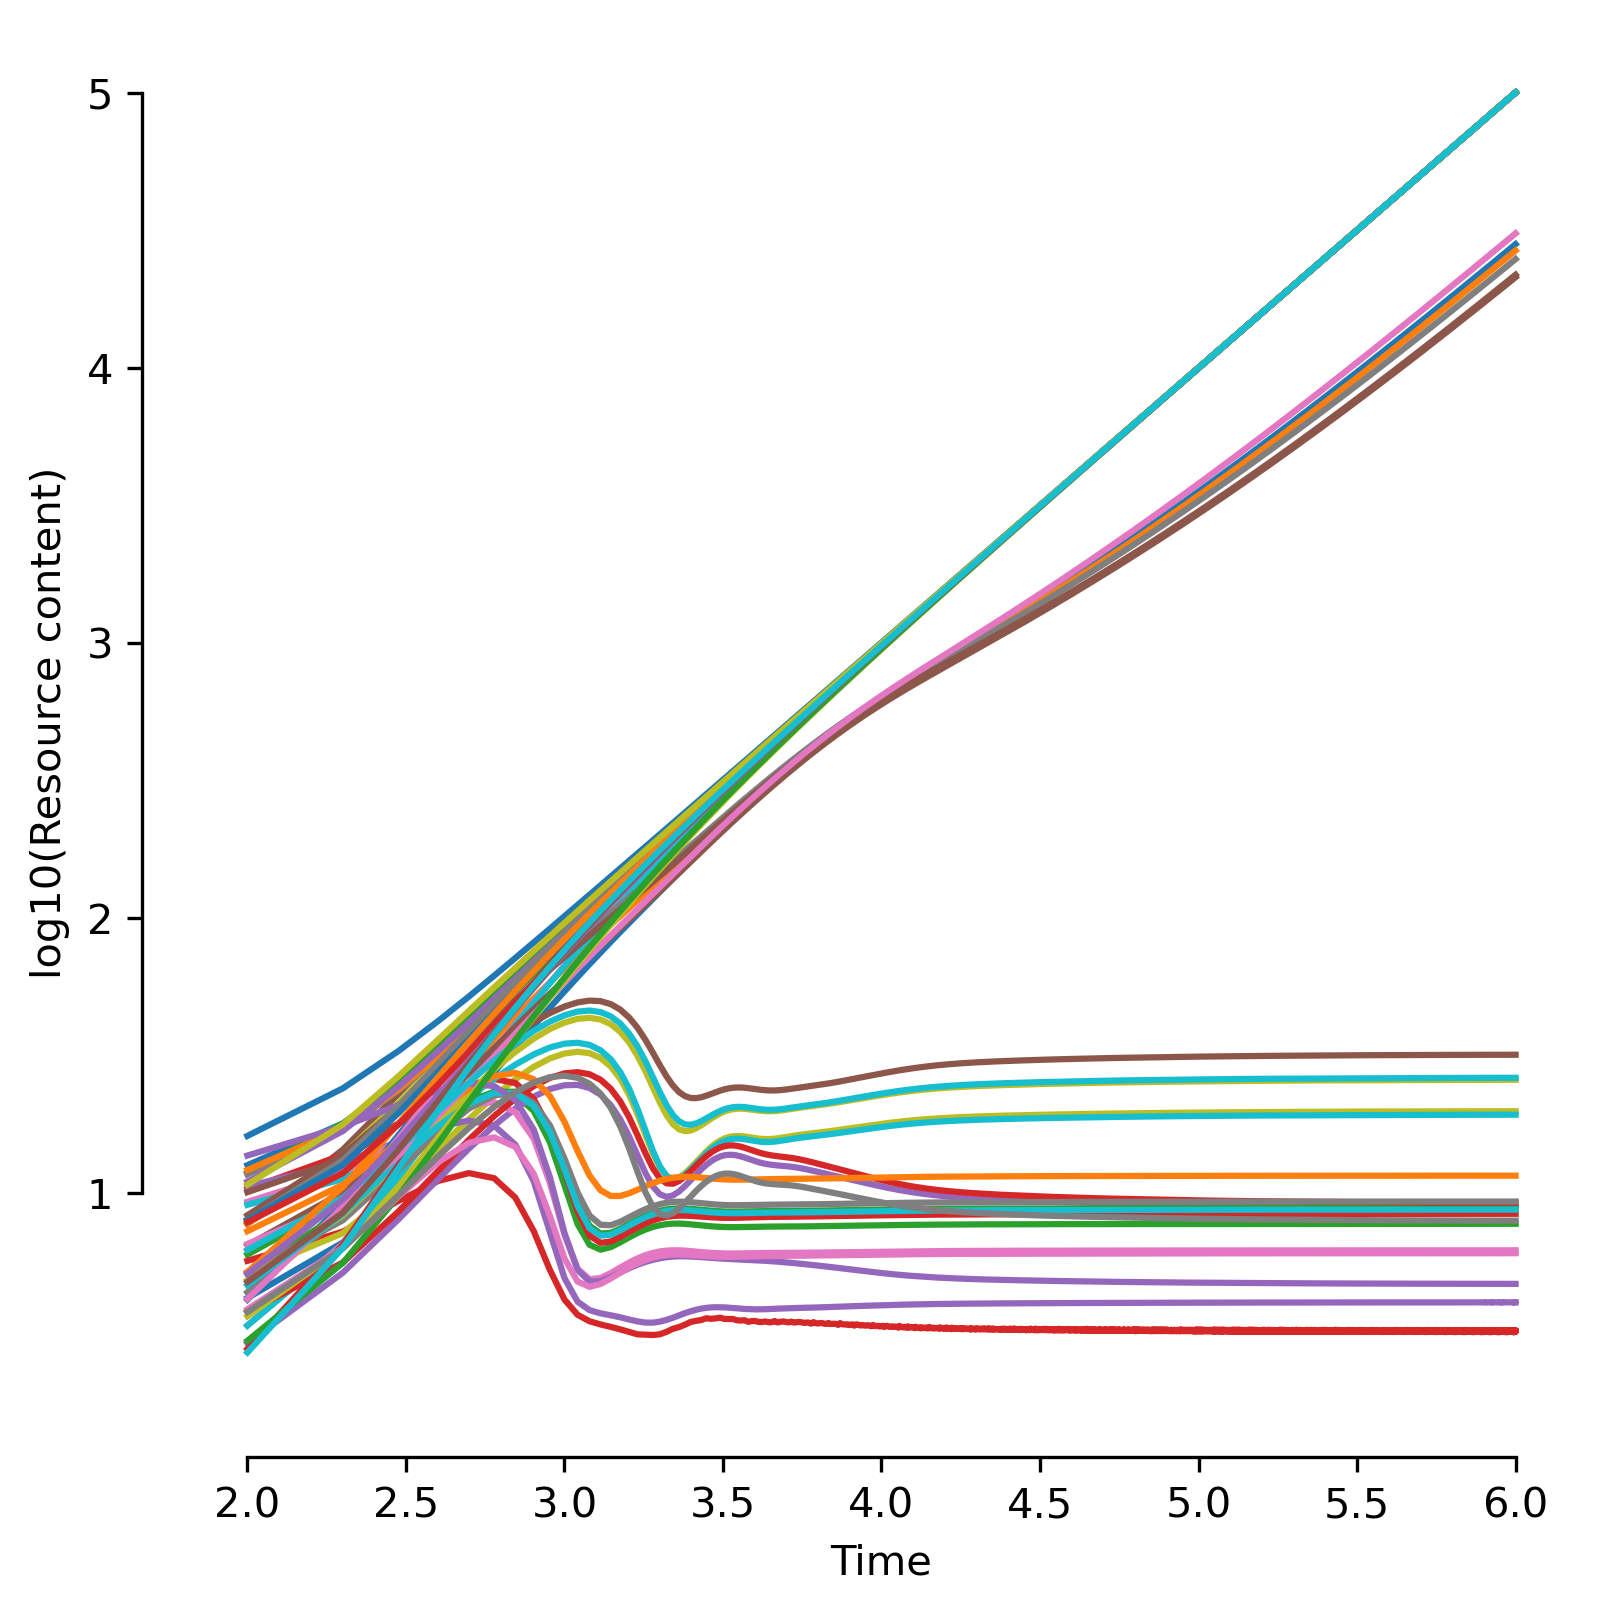

In [7]:
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('log10(Resource content)')
sns.despine(offset=10, trim=True)

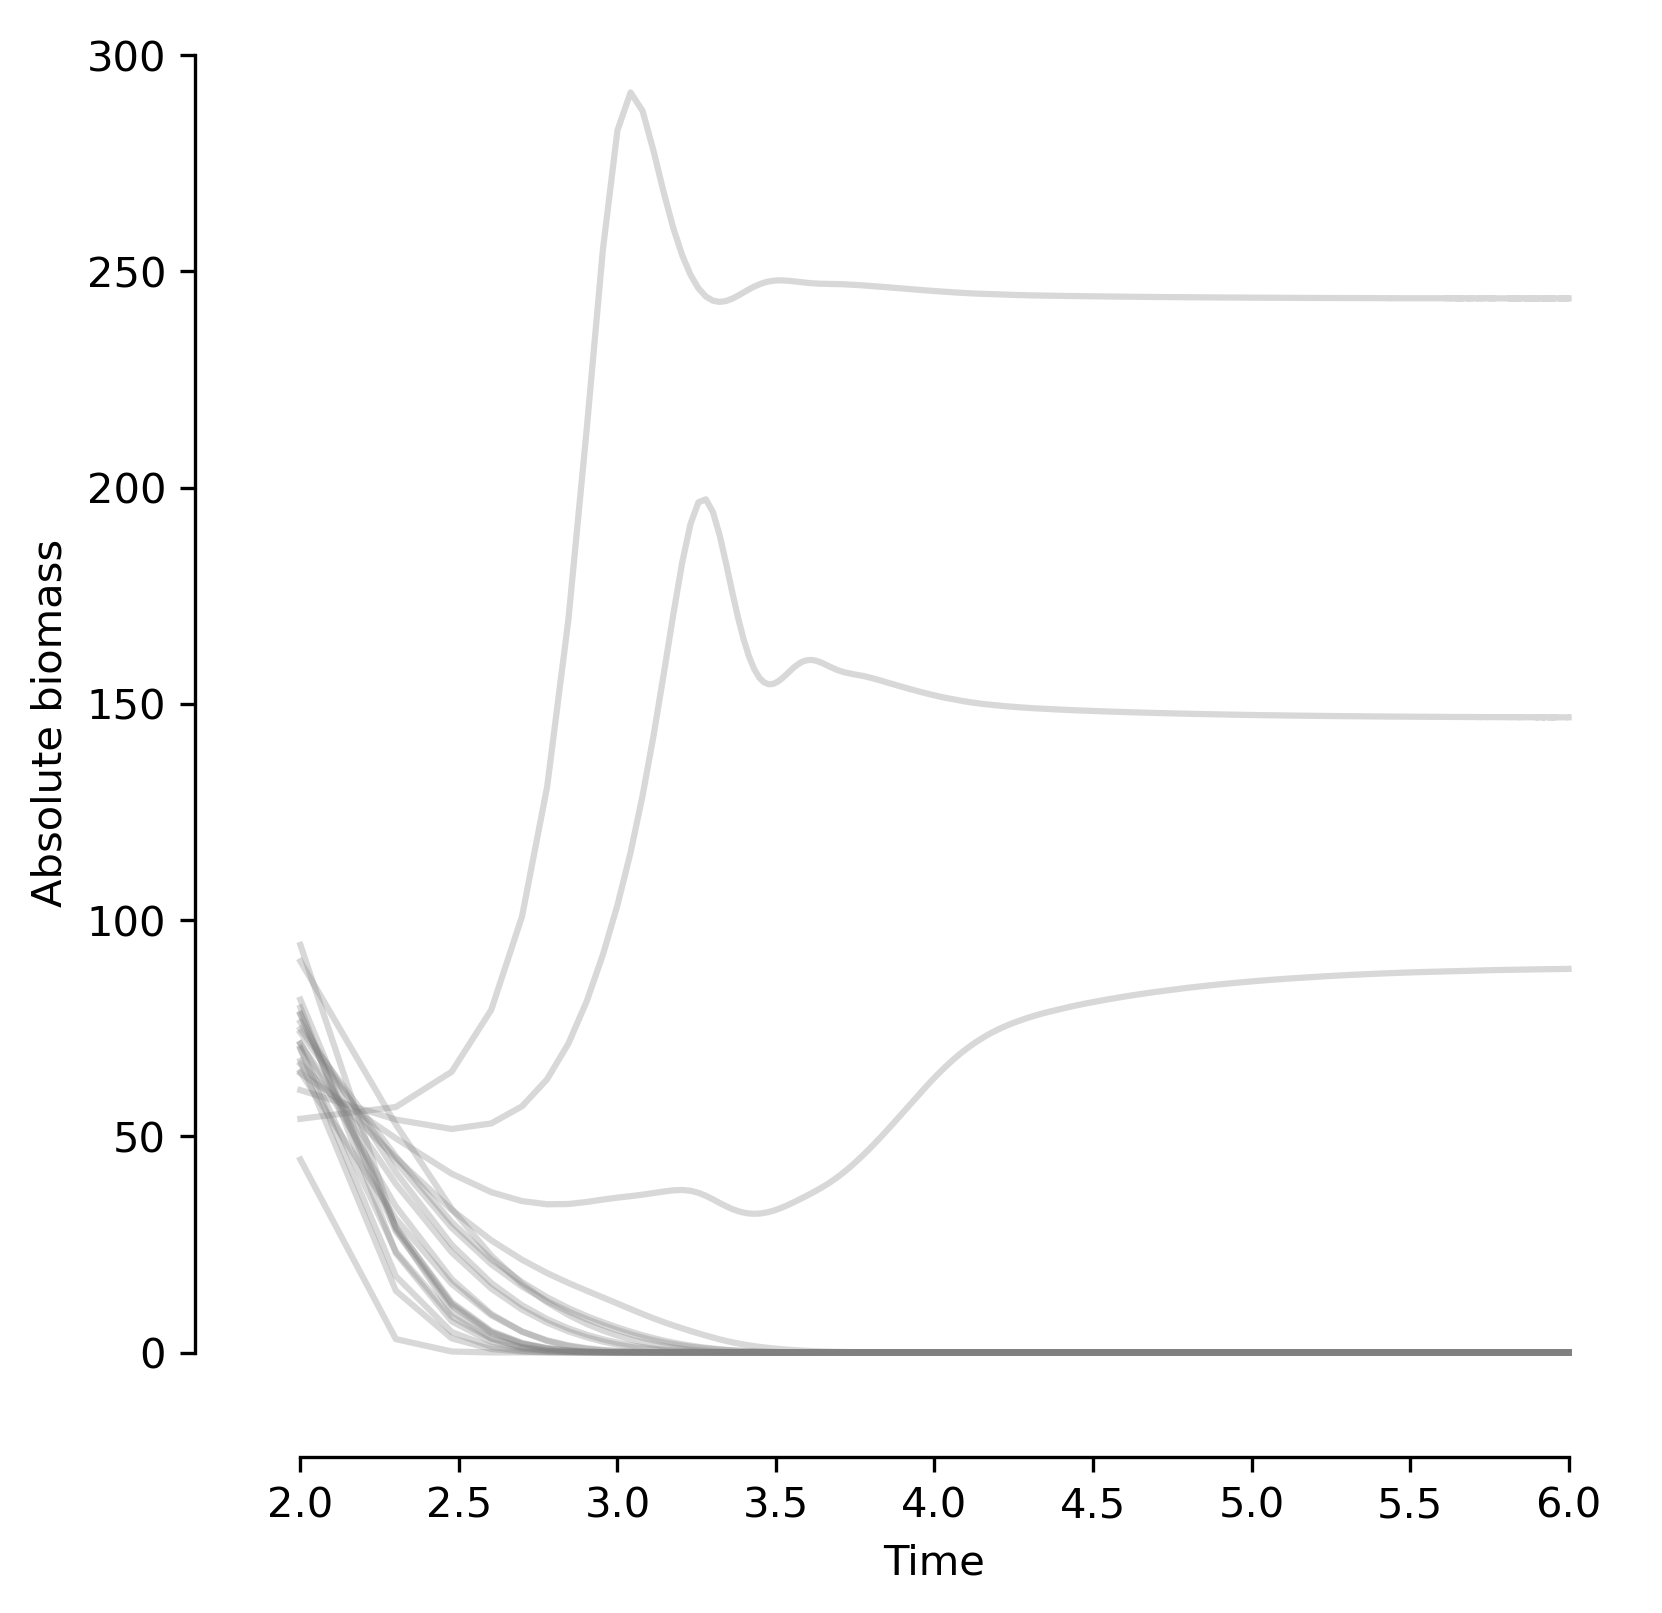

In [8]:
# plot species biomass trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=repr_Ct[i, :], color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Absolute biomass')
sns.despine(offset=10, trim=True)

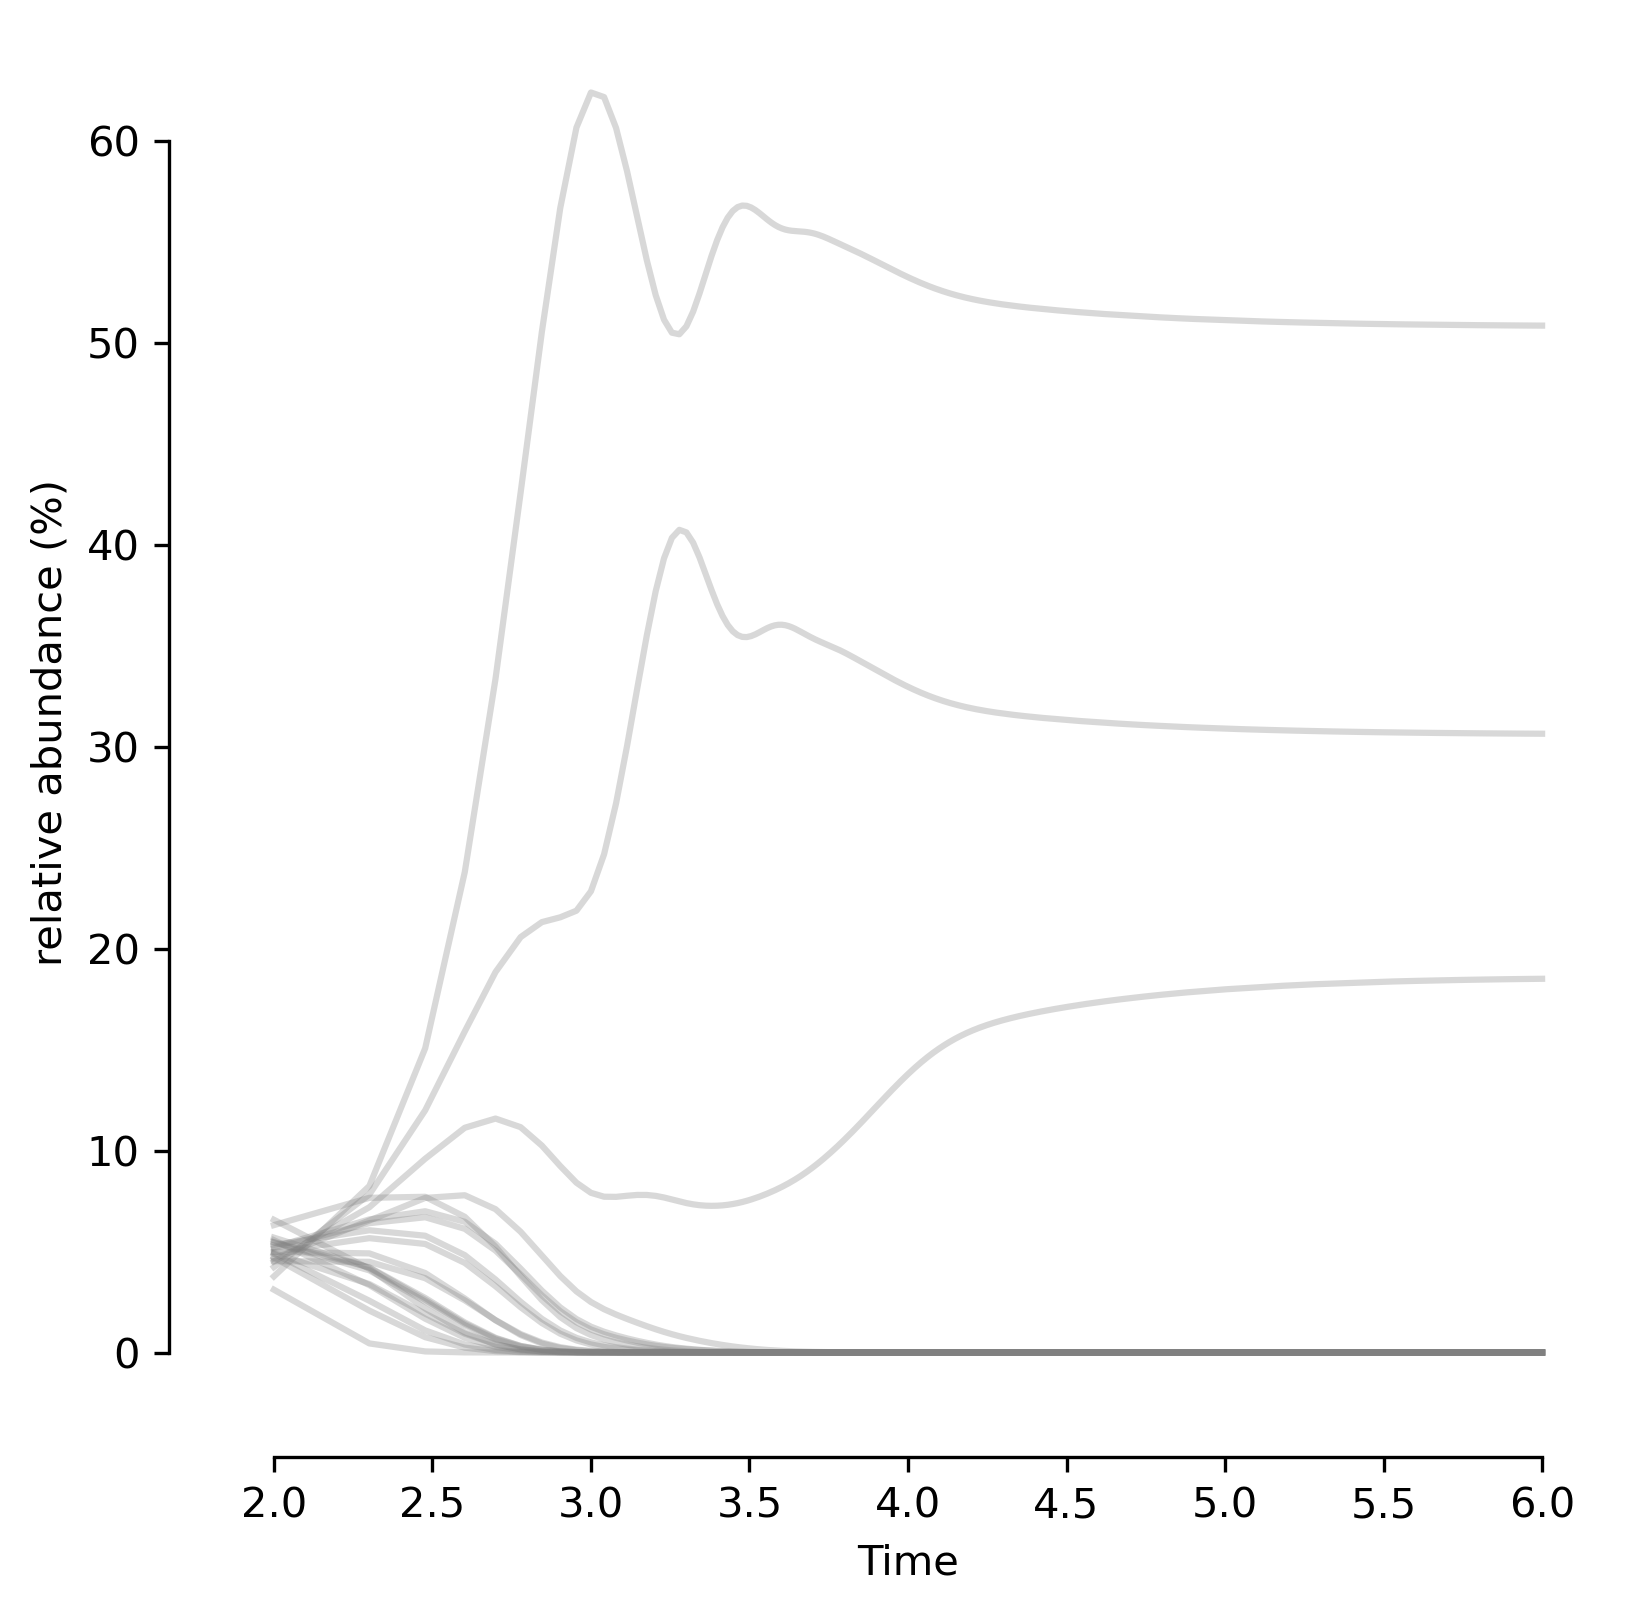

In [9]:
# plot species abudance trajectories
np.seterr(divide = 'ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100,color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('relative abundance (%)')
sns.despine(offset=10, trim=True)

In [10]:
repr_Ct.shape

(20, 10000)

In [11]:
repr_Ct[repr_Ct[:, -1] < 1e-8] = 0
logmass = np.log10(para.avgm.reshape(para.N,))
freq = repr_Ct[:, -1]/logmass

In [12]:
logmass.shape

(20,)

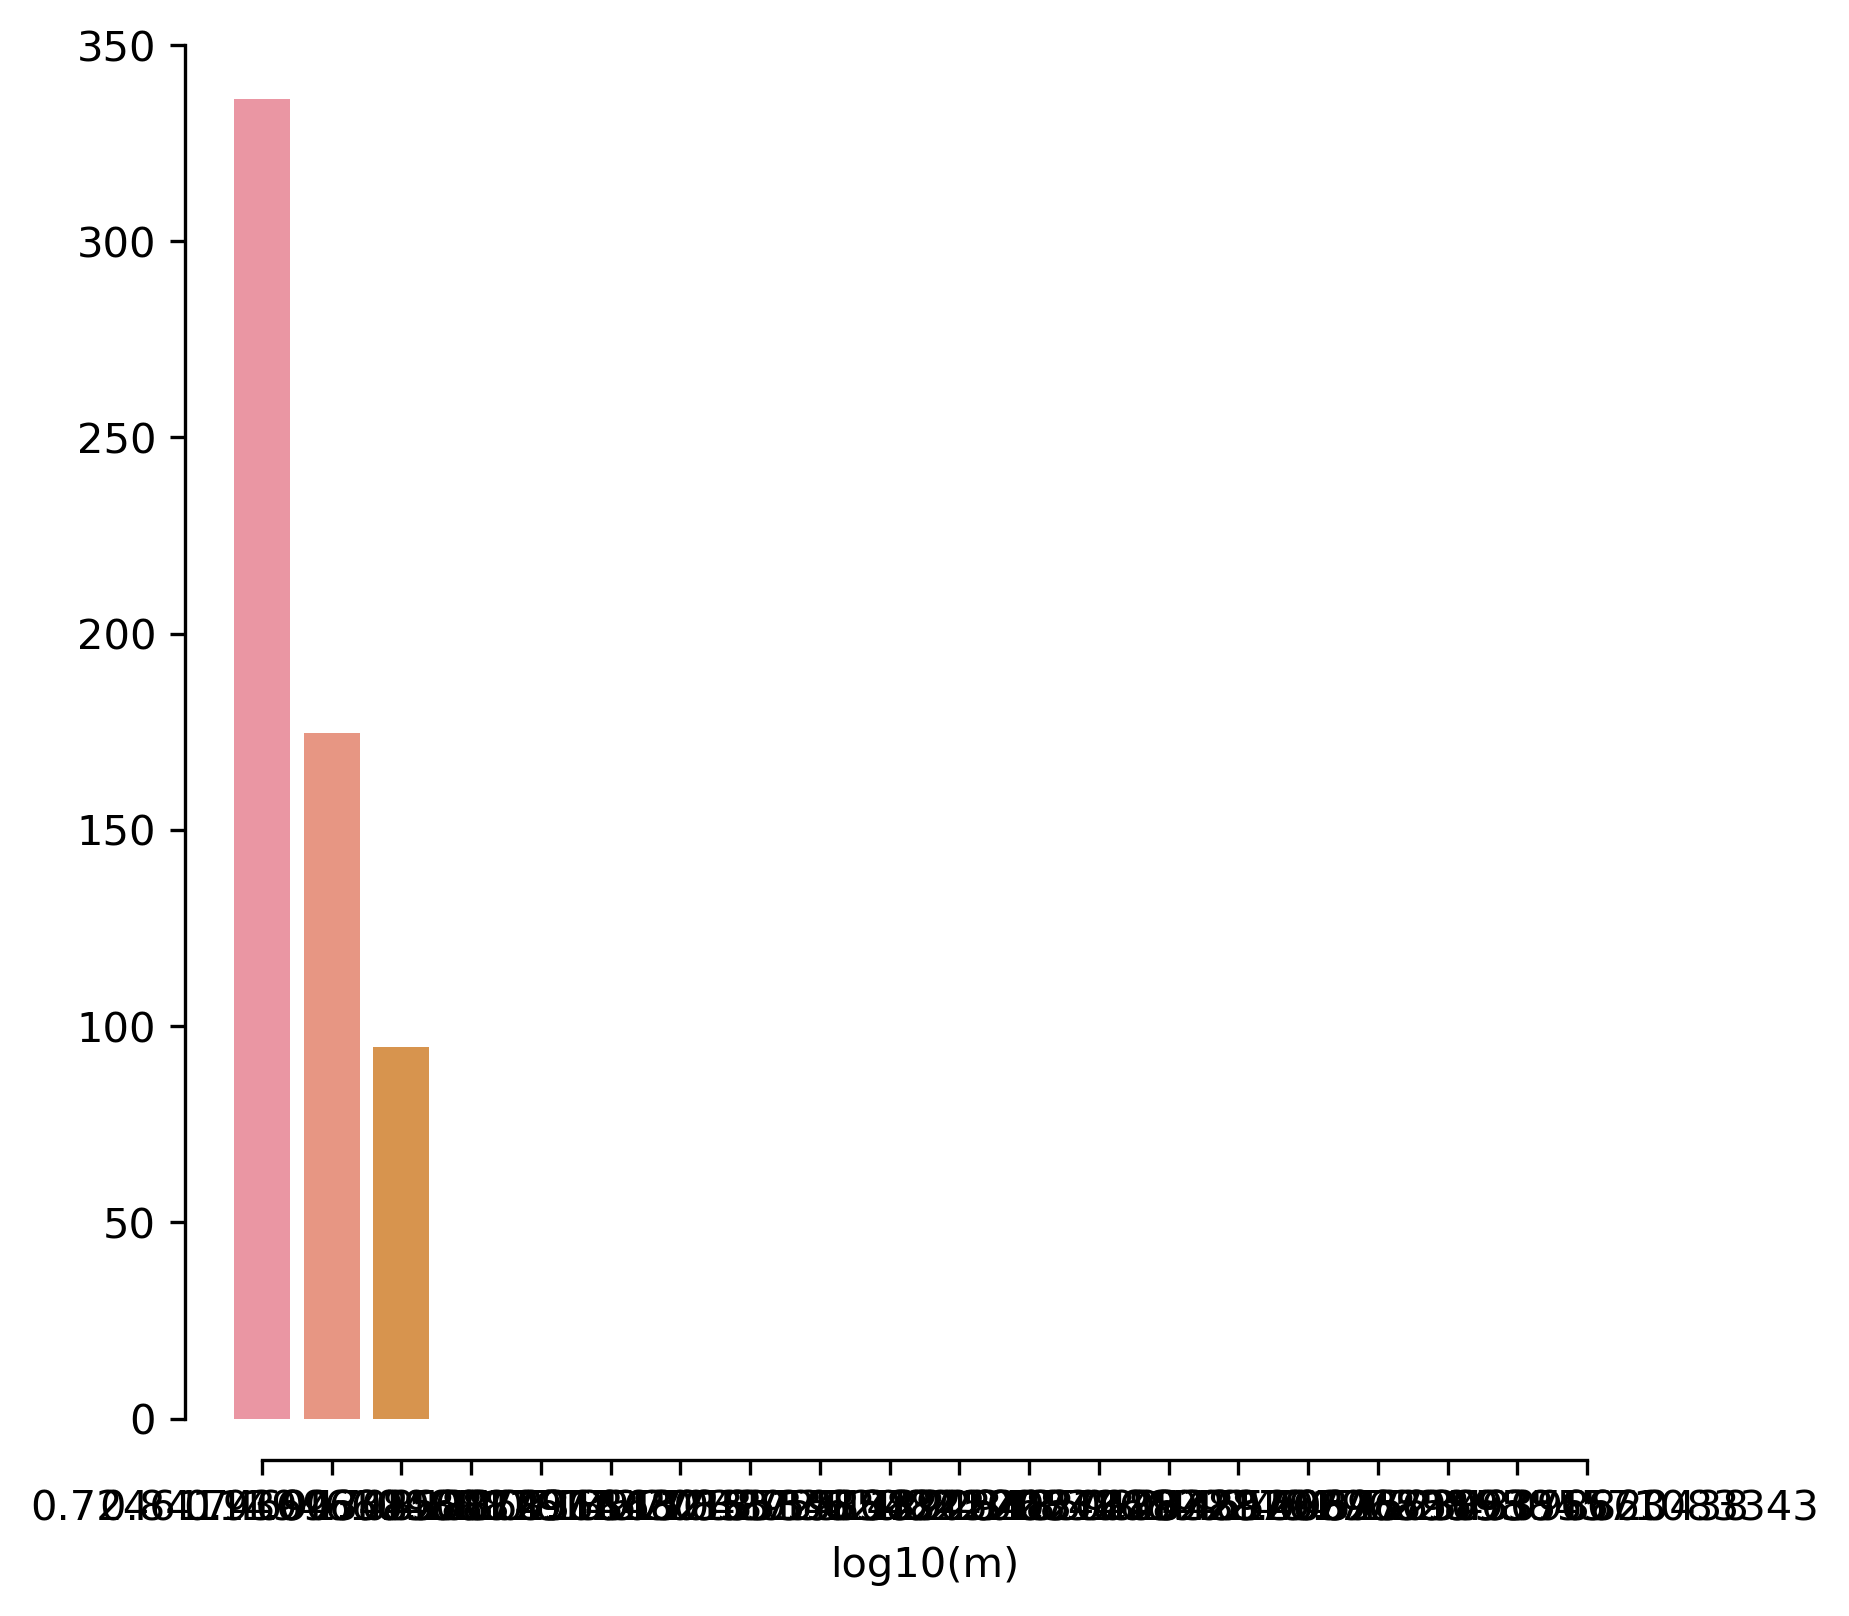

In [13]:
# Species abundance distirbution (SAD) 
# quantify the variation of abundance across species in a community

plt.figure(figsize=(6, 6), dpi=300)
sns.barplot(
    x = logmass, y=freq)

# plt.legend()
plt.xlabel('log10(m)')
plt.yticks(rotation=90)
sns.despine(offset=10, trim=True)

# Abundance fluctuation distribution AFD and mean abundance distirbution

- Load assembly data
- store in a list `Ct_abl` where each element is a `np.array`

In [14]:
base_dir = '..\Data'
sample_number = 1
type = '\sub_abl_beta=0.75'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\sAbl_{sample_number}'

In [15]:
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))
Ct_abl = np.empty((para.N, 30))
# load data
for i in range(1, 31):
    # define file path
    file_name = f'\sAbl_{i}' 
    Ct_abl[:, i-1] = np.load(base_dir + type + file_name + file_name + Ct_type)[:, -1]

- Next we plot AFD for each species
- first, reorganised data into `pd.Dataframe`
- then use `facetgrid` to visualised

In [16]:
vals = Ct_abl.flatten()
speclist = np.array([[f'species {i}']*30 for i in range(1, 21)]).flatten()
tardf = pd.DataFrame({'Biomass': vals, 'Species': speclist})
tardf['Biomass'] = np.log10(tardf['Biomass'])

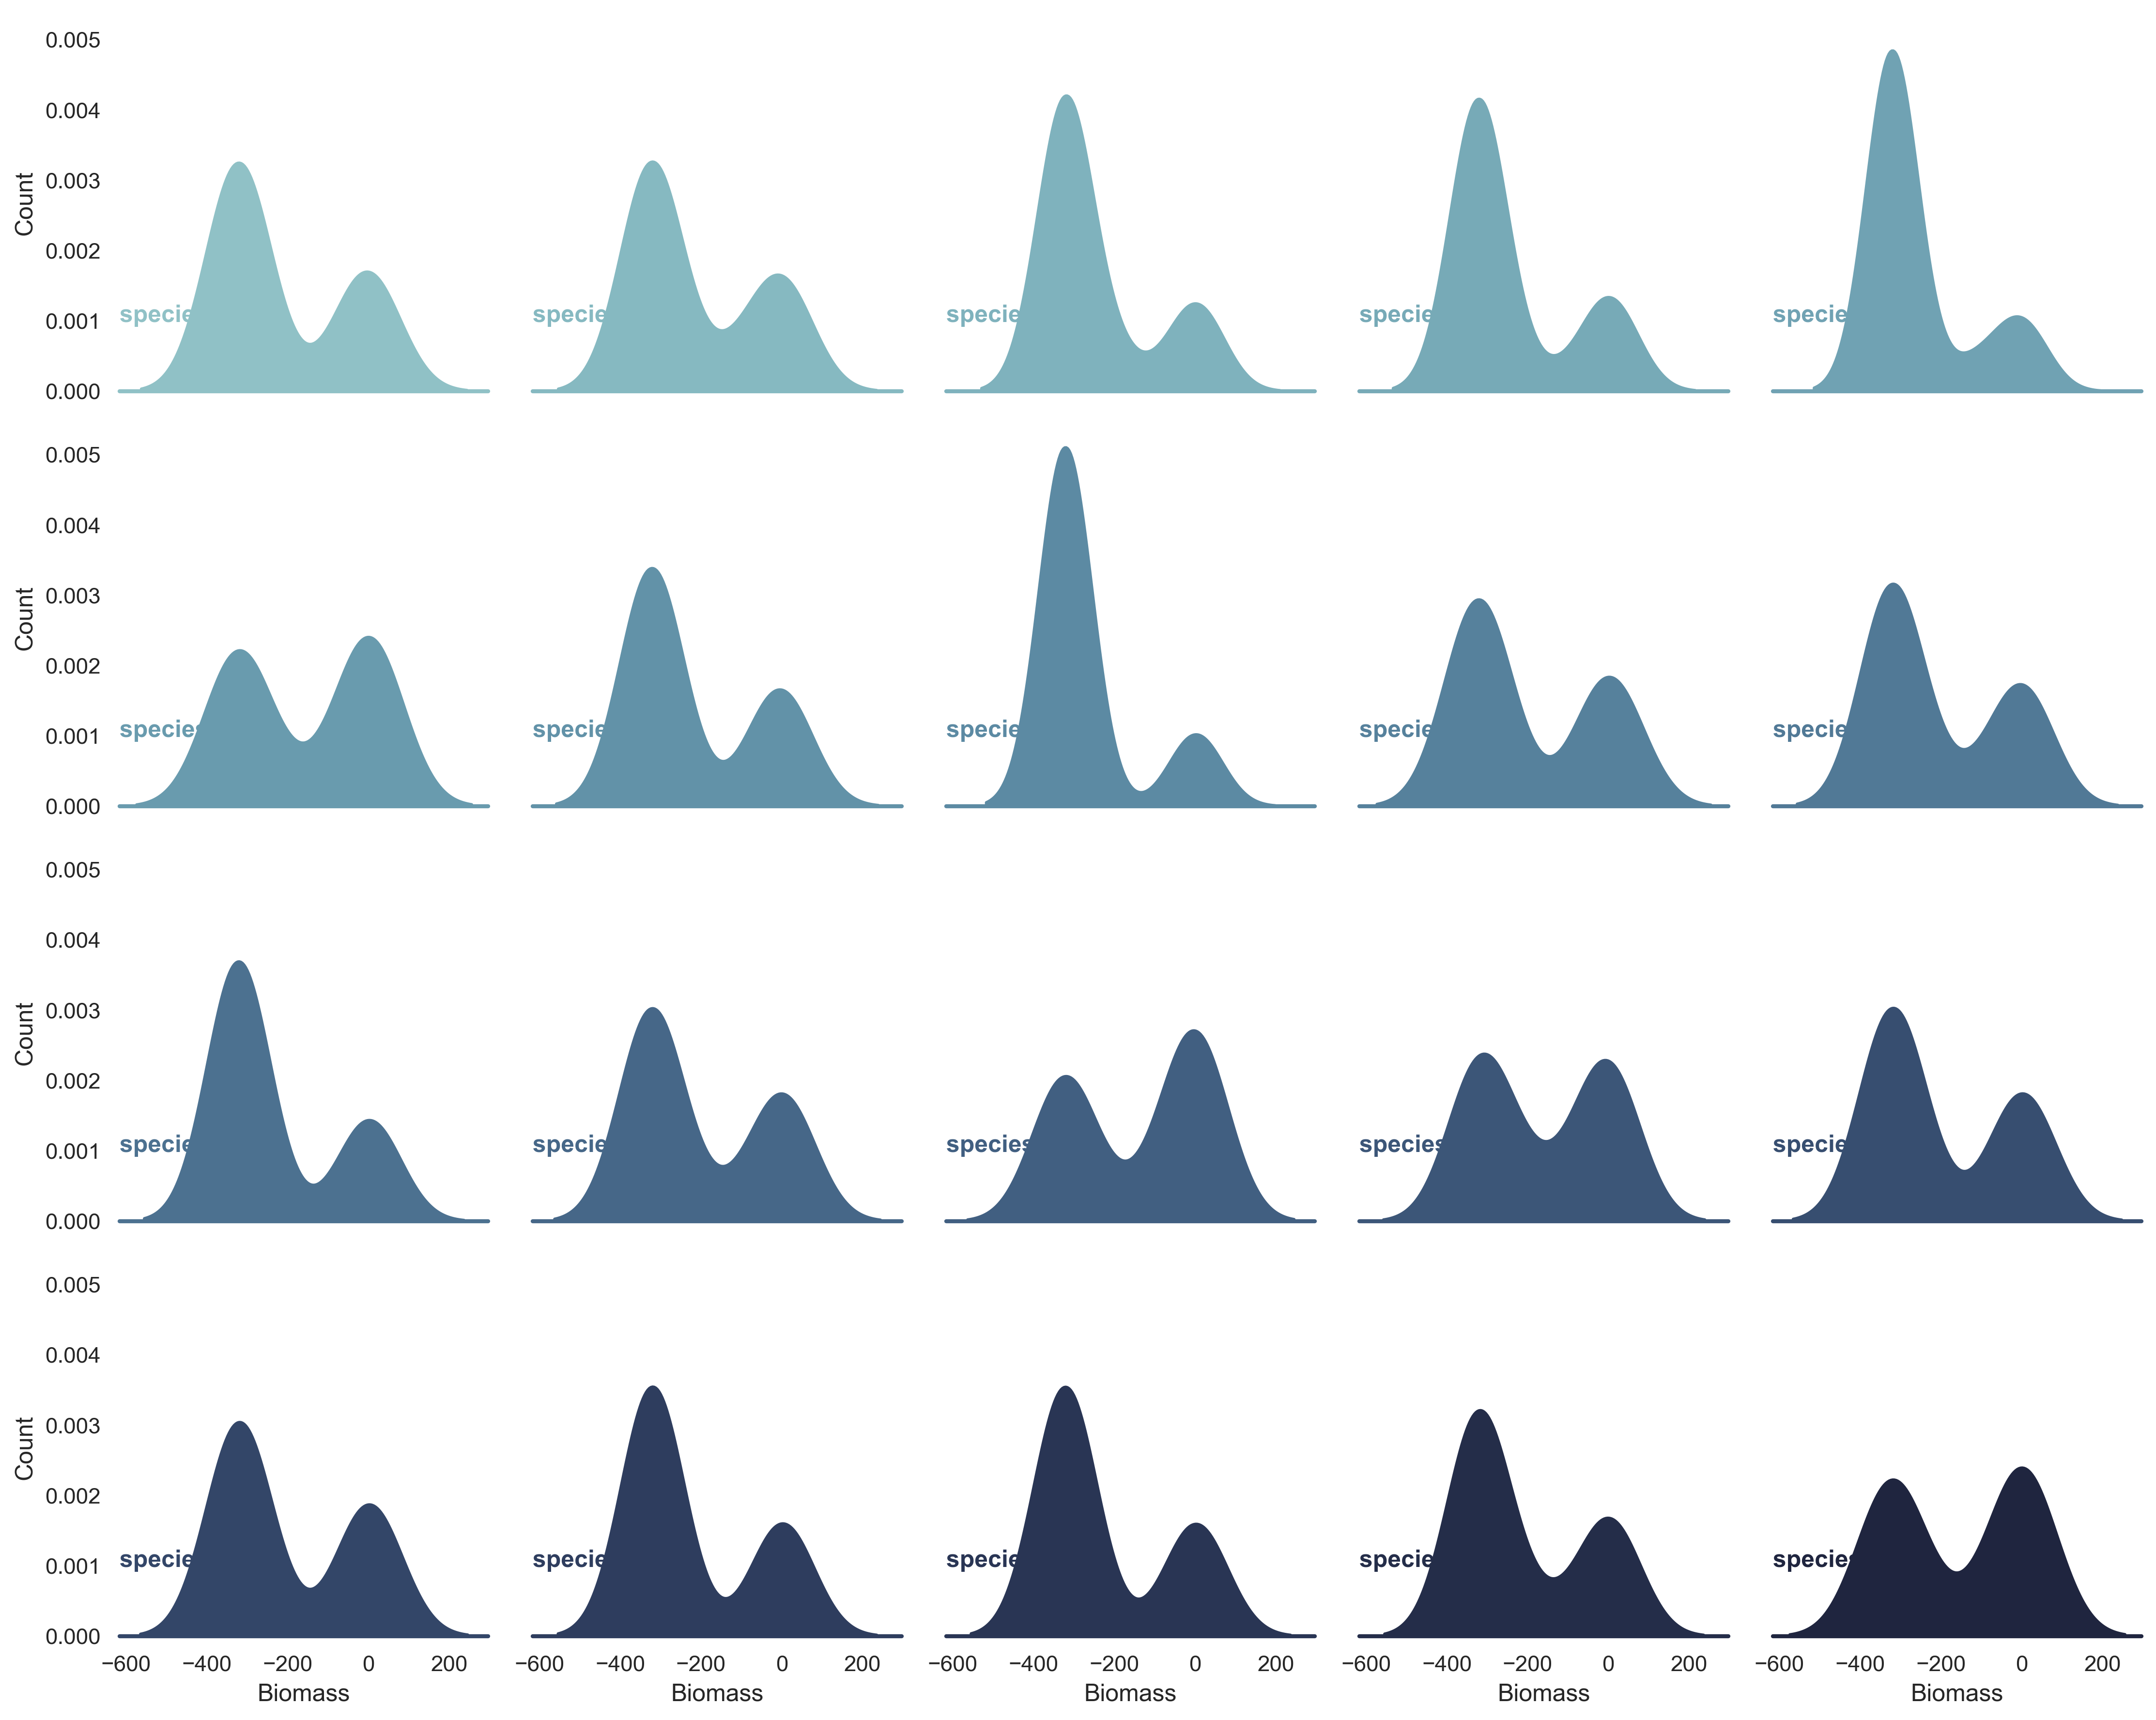

In [17]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'figure.figsize':(6, 6), 'figure.dpi':300})
pal = sns.cubehelix_palette(20, rot=-.25, light=.7)
g = sns.FacetGrid(tardf, col='Species', col_wrap=5, hue='Species', palette=pal, sharex=True, sharey=True)
g.map(sns.kdeplot, "Biomass",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
g.refline(x=tardf['Biomass'].mean(), linestyle='-', color='grey')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Biomass")
g.set_titles("")
g.set(ylabel="Count")
g.despine(bottom=True, left=True)
g.tight_layout()

# Loading $\beta$ = -0.25

In [17]:
base_dir = '..\Data'
sample_number = 1
type = '\-25_beta'
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'
file_name = f'\Abl_{sample_number}'

In [18]:
# start loading
repr_t = np.load(base_dir + type + file_name + file_name + t_type)
repr_Rt = np.load(base_dir + type + file_name + file_name + Rt_type)
repr_Ct = np.load(base_dir + type + file_name + file_name + Ct_type)
para = pkl.load(open(base_dir + type + file_name + file_name + Para_type, 'rb'))

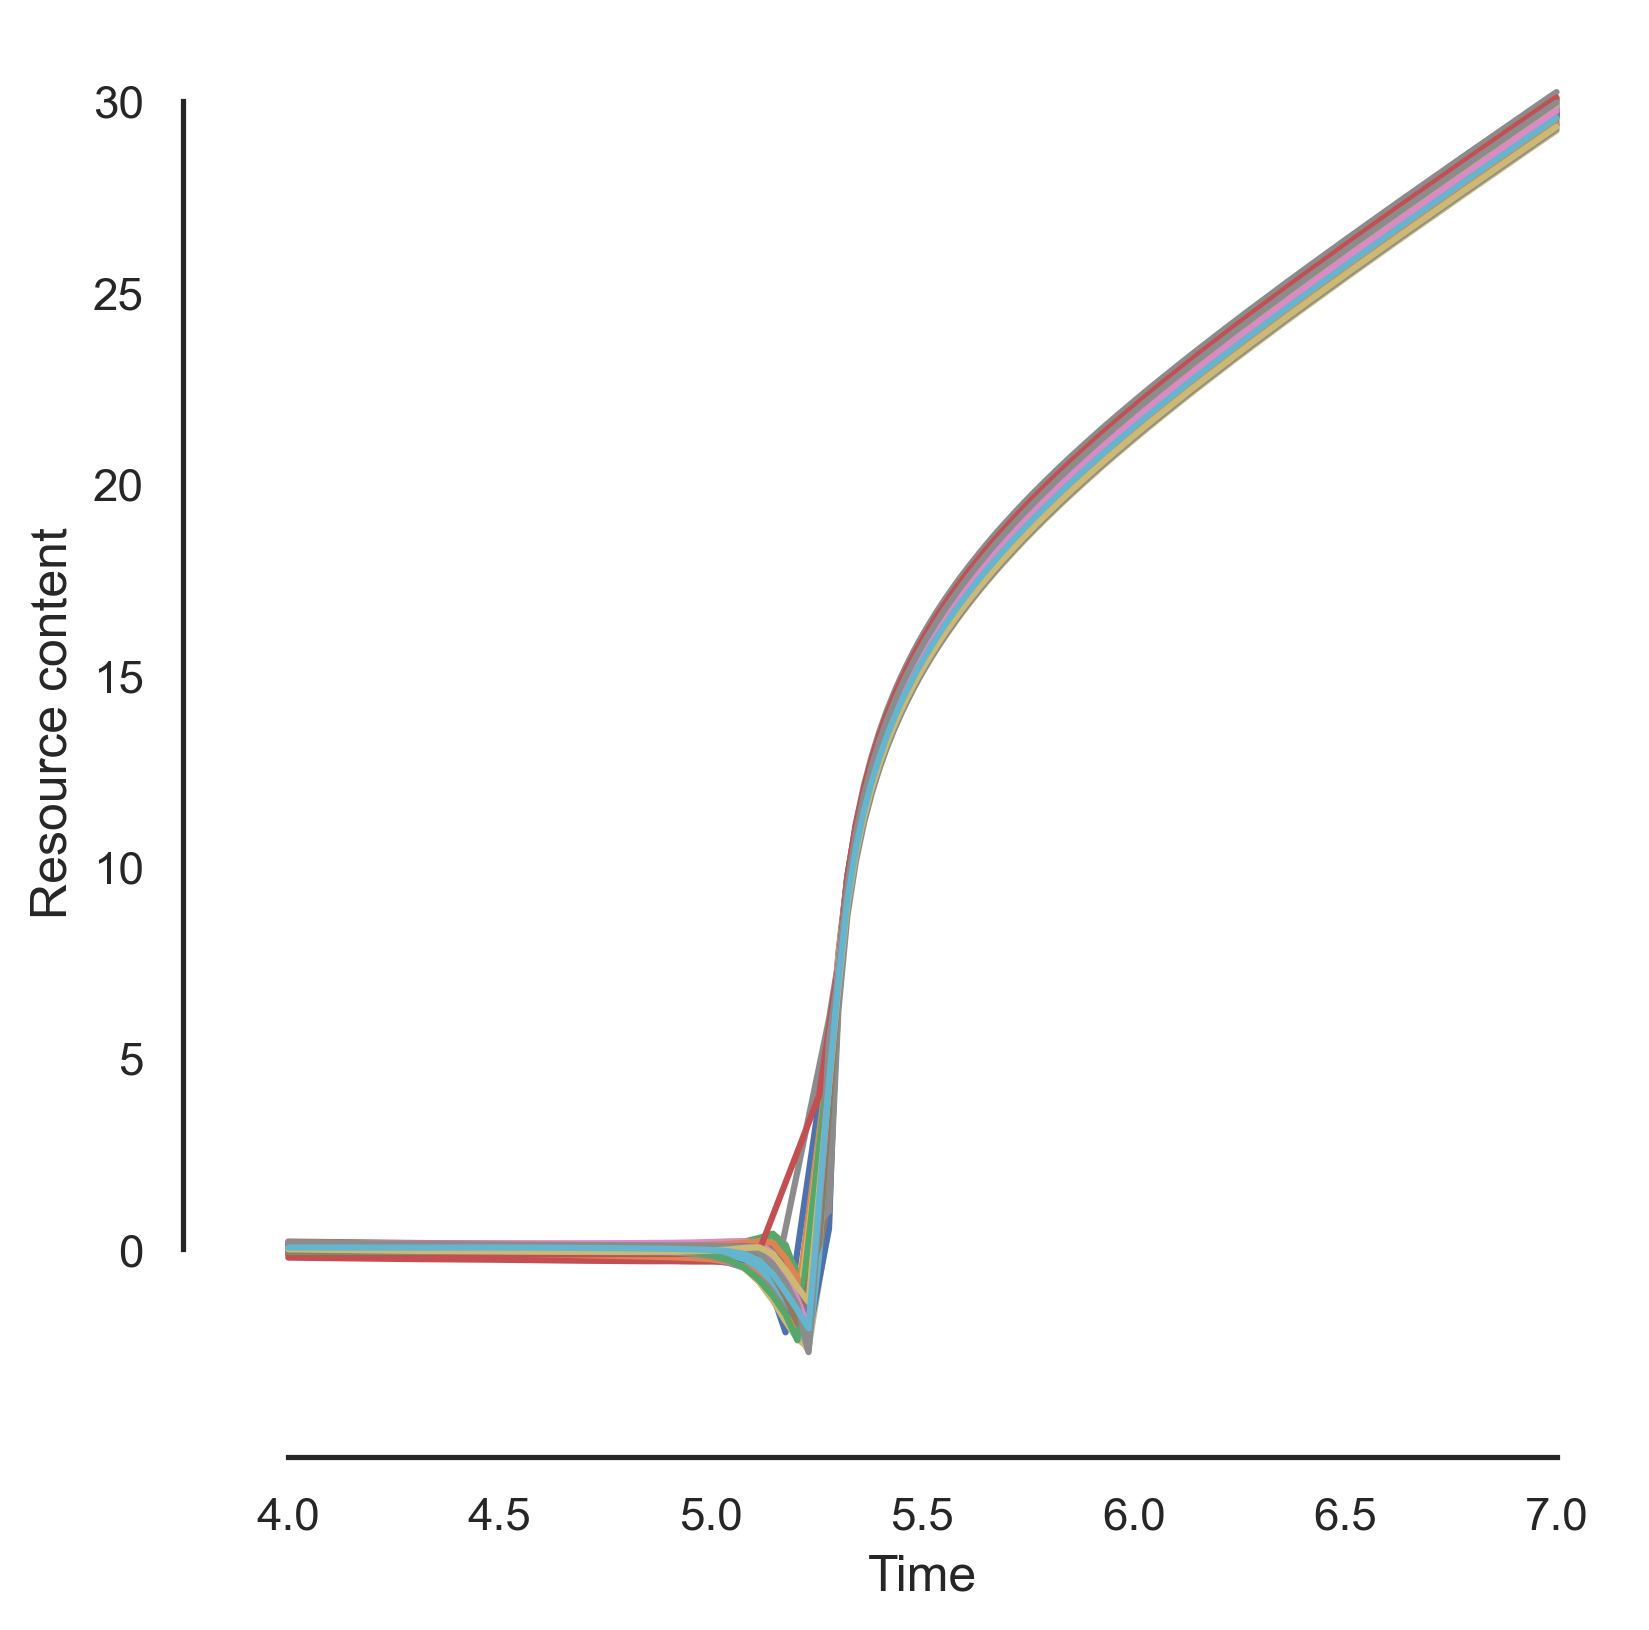

In [19]:
np.seterr(divide = 'ignore', invalid='ignore')

plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.M):
    sns.lineplot(x=np.log10(repr_t), y= np.log10(repr_Rt[i, :]))
plt.xlabel('Time')
plt.ylabel('Resource content')
sns.despine(offset=10, trim=True)

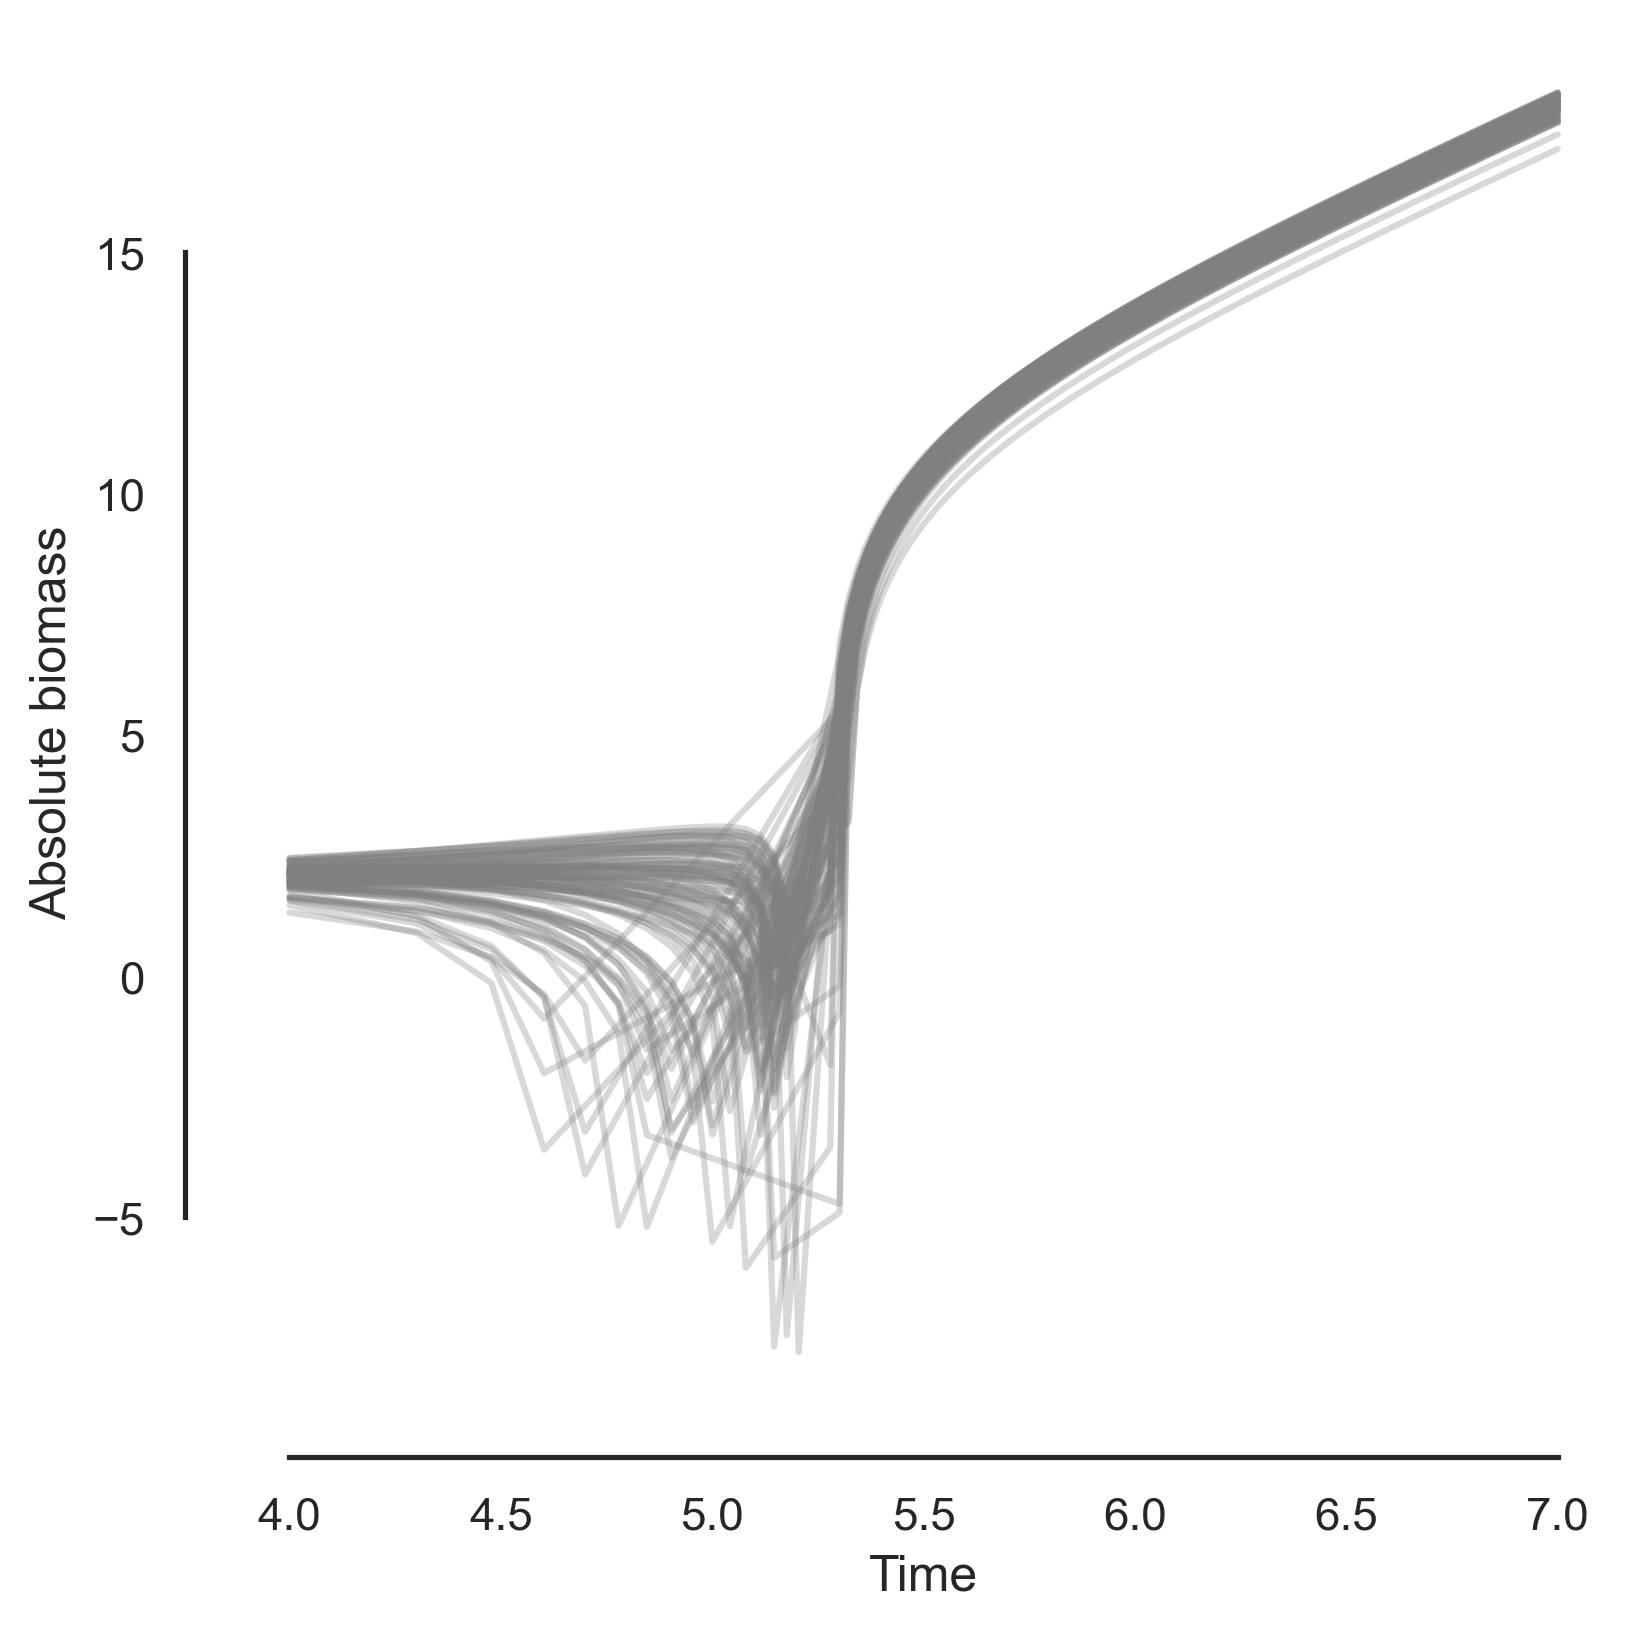

In [20]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=np.log10(repr_Ct[i, :]), color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Absolute biomass')
sns.despine(offset=10, trim=True)

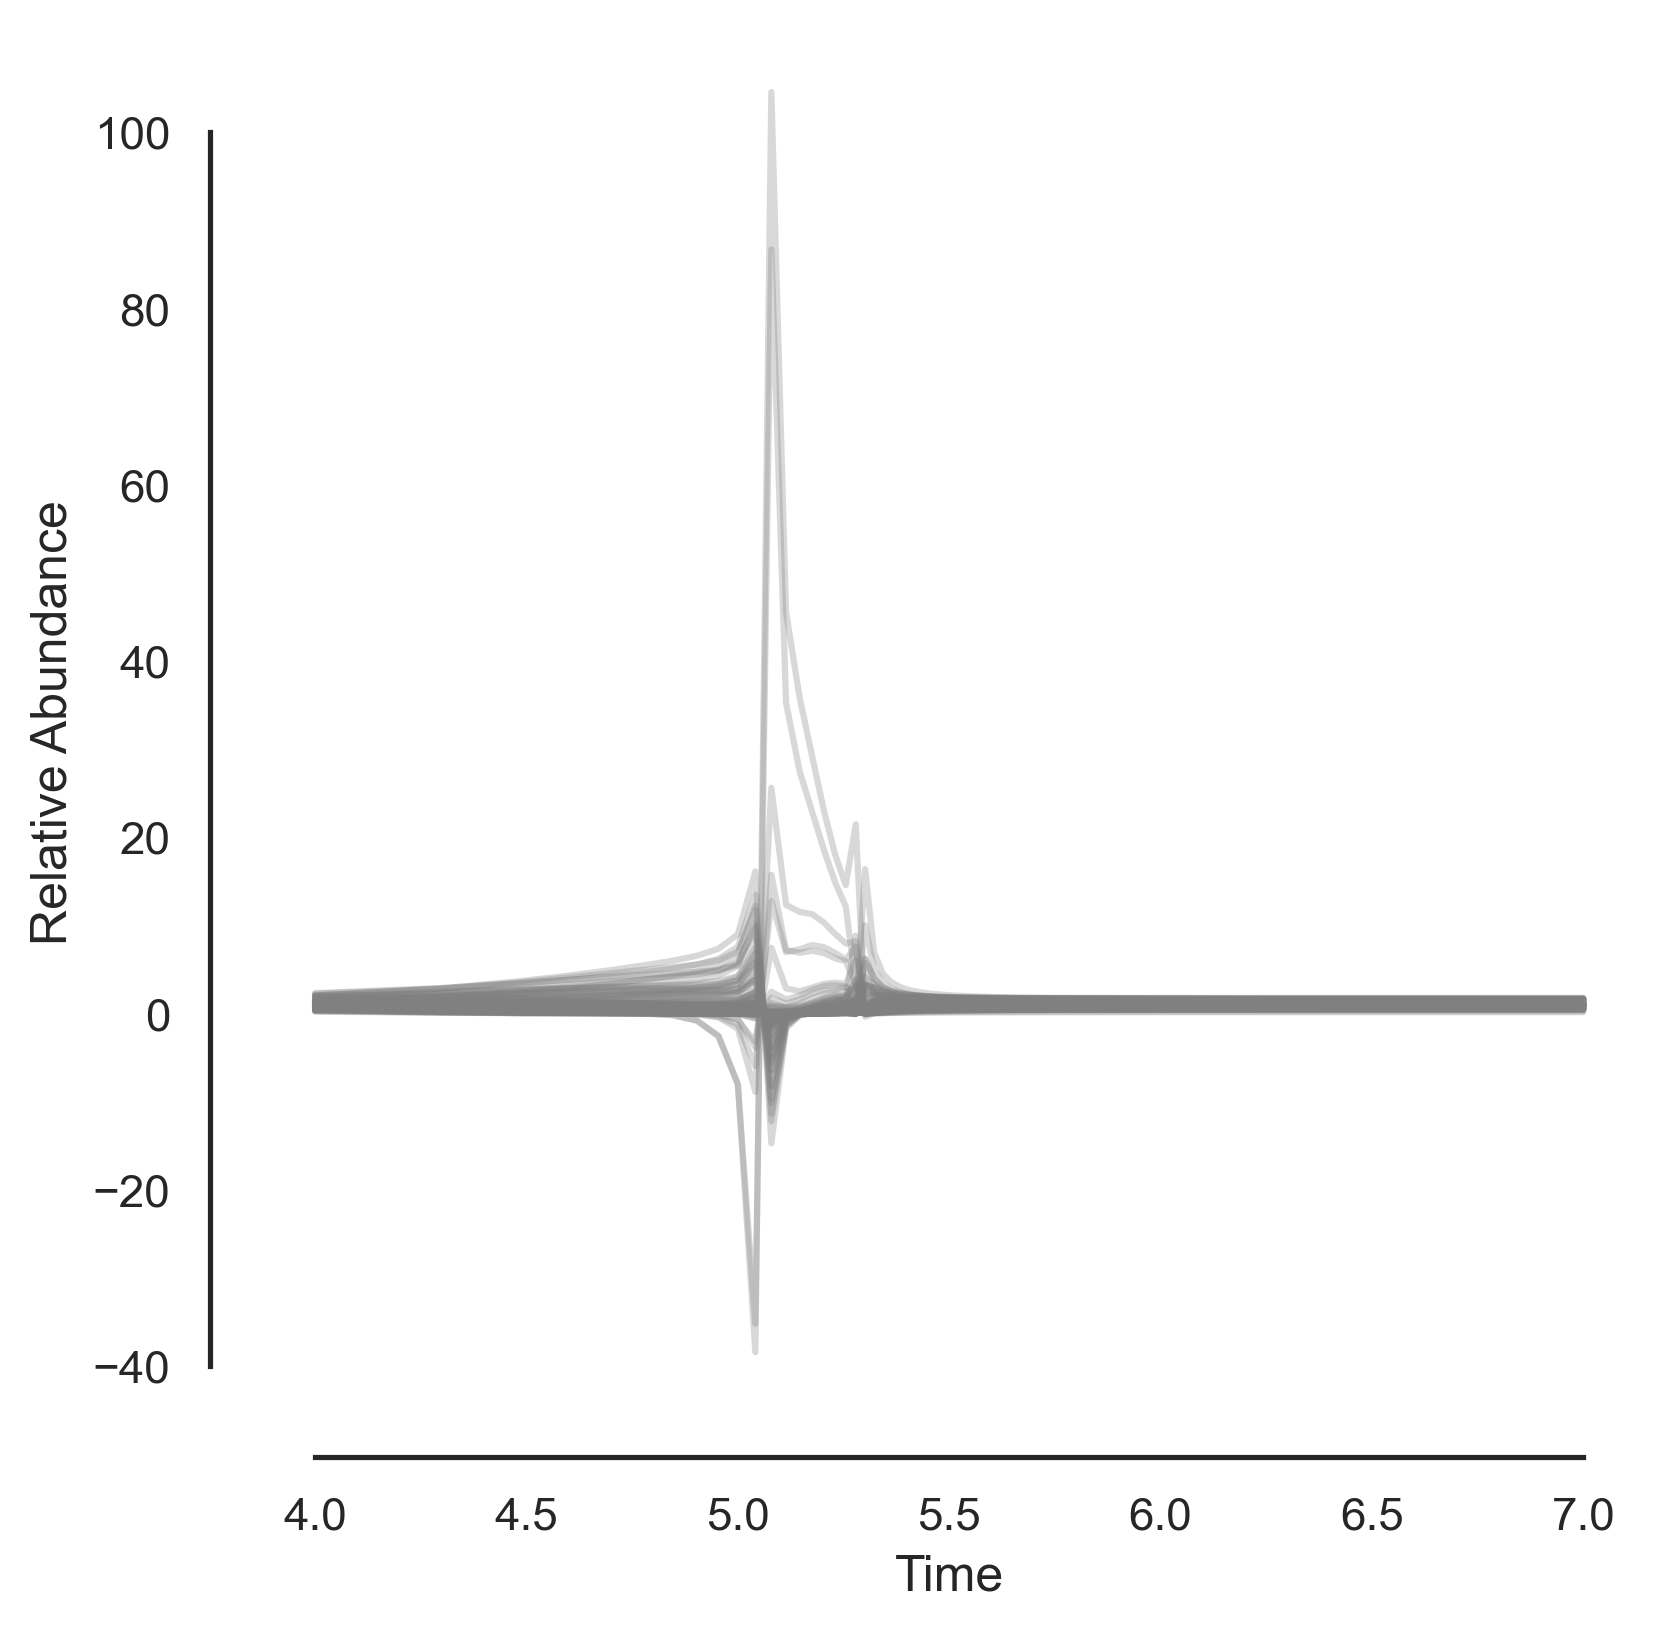

In [21]:
np.seterr(divide = 'ignore', invalid='ignore')
plt.figure(figsize=(6, 6), dpi=300)
for i in range(para.N):
    sns.lineplot(x=np.log10(repr_t), y=relative_abundance(repr_Ct)[i, :]*100, color='grey', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Relative Abundance')
sns.despine(offset=10, trim=True)

# AFD for varying w

### Loading data

In [18]:
base_dir = '..\Data\\variedC'
weight_number = 1
sample_number = 1 
t_type = '_t.npy'
Para_type ='_Para.pkl'
Rt_type = '_Rt.npy'
Ct_type = '_Ct.npy'


In [148]:
warray = np.empty((50,))
Cw = []
ids = []
avgm_w = []
for i in range(50):
    session = f'\w_{i+1}'
    with open(base_dir + session + f'\w{i+1}' + '_sAbl_1_Para.pkl', 'rb') as f:
        para = pkl.load(f)
    f.close()
    warray[i] = para.w # get corresponding size parameters
    Ct_abl = np.empty((para.N, 30)) # array containig 30 communities
    avgm_abl = np.empty((para.N, 30)) 
    
    for j in range(1, 30+1):
        file_name = f'\w{i+1}_sAbl_{j}'
        dir = base_dir + session + file_name
        Ct_abl[:, j-1] = np.load(dir + Ct_type)[:, -1]
        p = pkl.load(open(dir+Para_type, 'rb'))
        avgm_abl[:, j-1] = p.avgm.reshape(para.N, )
        Ct_abl[:, j-1] = Ct_abl[:, j-1]/avgm_abl[:, j-1]
    

    Cw.append(Ct_abl)
    avgm_w.append(avgm_abl)
        

In [162]:
p.avgm == para.avgm

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [149]:
species = 12
alpha = np.empty(warray.shape)
beta = np.empty(warray.shape)
for i, _ in enumerate(warray):
    afd = Cw[i][species]
    if np.var(afd) != 0:
        fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log10(afd))
        alpha[i] = fit_alpha
        beta[i] = fit_beta 
    else:
        alpha[i] = 0
        beta[i] = 0
    
    # fit_alpha, fit_loc, fit_beta=stats.gamma.fit(np.log10(afd))
    # alpha[i] = fit_alpha
    # beta[i] = fit_beta 


In [48]:
# alpha = np.log10(alpha)
# beta = np.log10(beta)

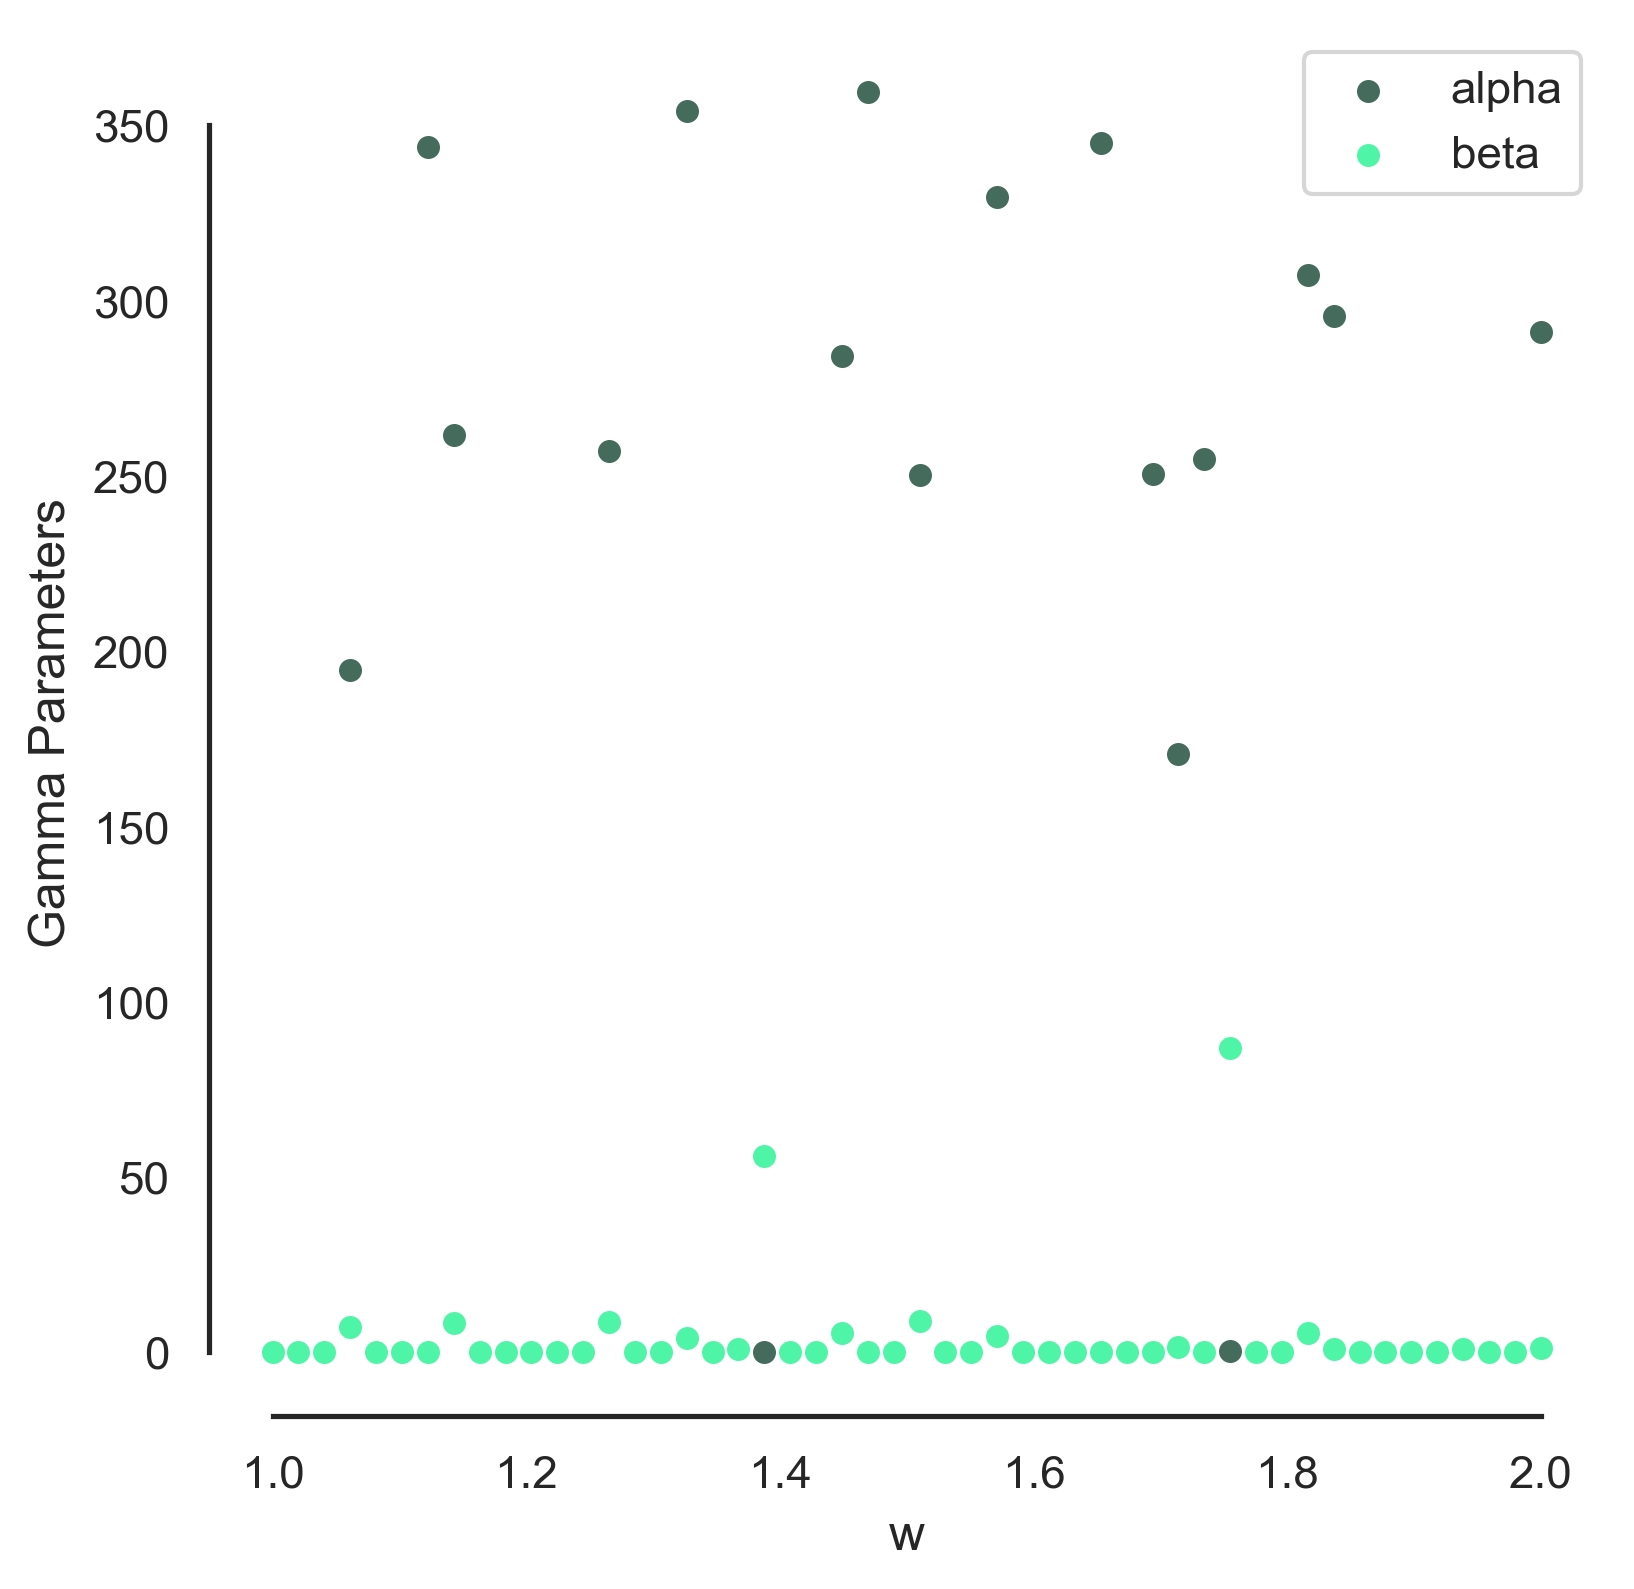

In [150]:
sns.set_theme(style='white', rc={'figure.dpi':300})
sns.scatterplot(x=warray, y=alpha, label='alpha', color='#456B5C')
sns.scatterplot(x=warray, y=beta, label='beta', color='#4ef5a7')
plt.legend()
plt.xlabel('w')
plt.ylabel('Gamma Parameters')
sns.despine(offset=.1, trim=True)

In [151]:
stats.pearsonr(warray, alpha)


PearsonRResult(statistic=0.05511639470204105, pvalue=0.7038240253350093)

In [152]:
stats.pearsonr(warray, beta)

PearsonRResult(statistic=0.0498902872283845, pvalue=0.7307942226694634)

# mean across-community distirbution (MAD)

In [153]:
madlist = []
madvar = []
for i, _ in enumerate(warray):
    afd = Cw[i]
    for j in range(30):
        afd[:, j] = (afd[:, j]/np.sum(afd[:, j]))*100
    mad = np.sum(afd, axis=1)/30
    mv = np.var(afd, axis=1)
    mad[mad==0] = 1
    mad[mad<1e-4] =1
    madvar.append(mv)
    madlist.append(mad)

In [154]:
afd.shape

(20, 30)

Text(0.5, 0, 'w')

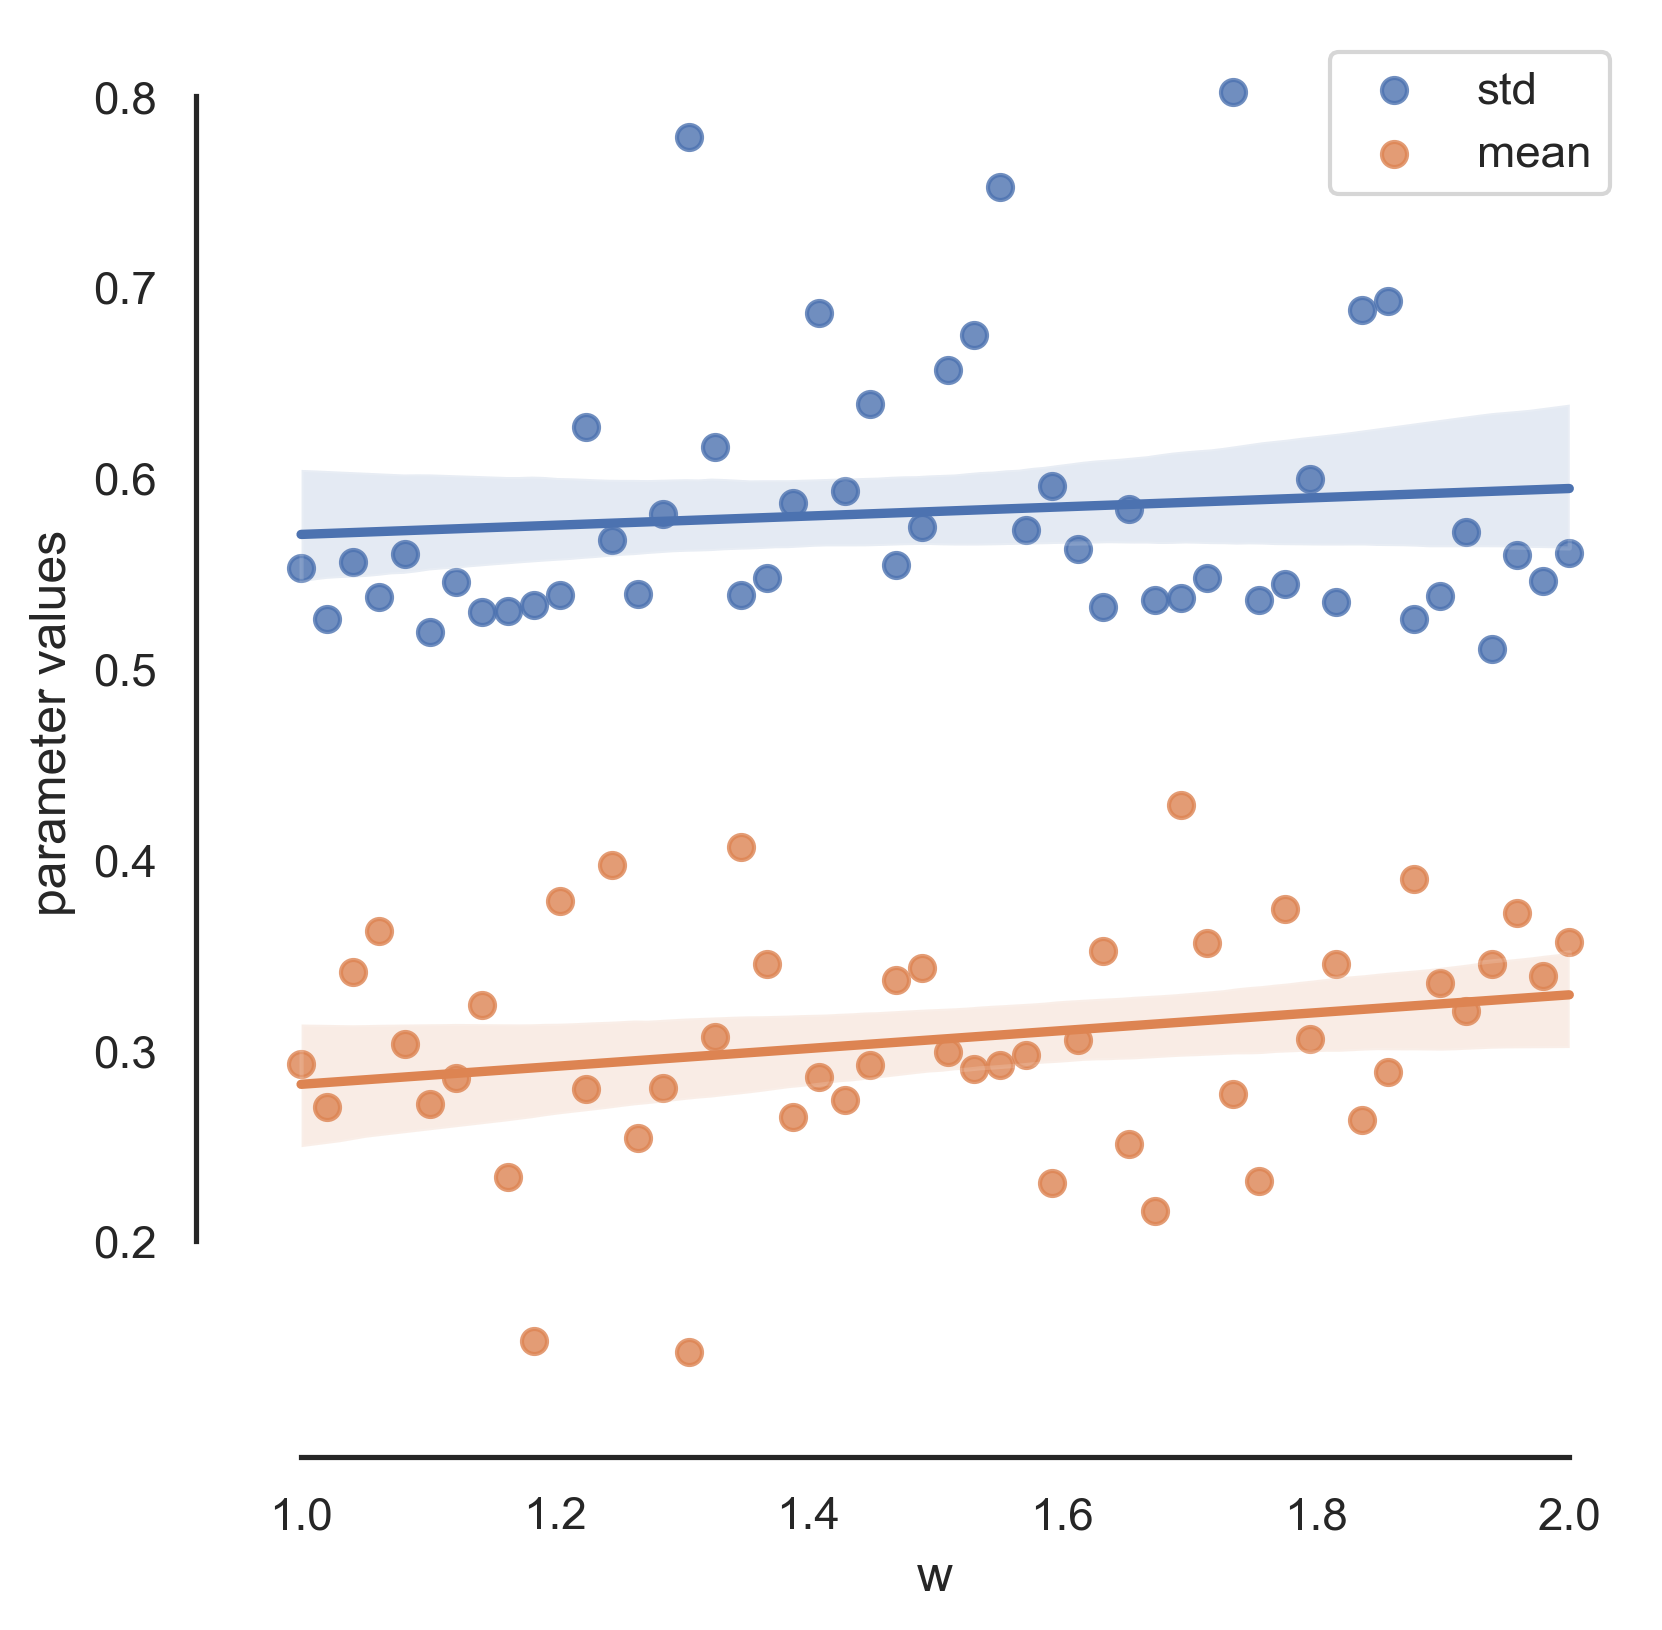

In [159]:
stdl = []
mul = []
for i in range(len(madlist)):
    mad = madlist[i]
    mu, std = stats.norm.fit(np.log10(mad), method='mle')
    stdl.append(std)
    mul.append(mu)
    # sns.distplot(np.log10(mad), fit=norm, kde=False)

sns.regplot(x=warray, y=stdl, label='std')
sns.regplot(x=warray, y=mul, label='mean')
plt.legend()
sns.despine(trim=True, offset=10)
plt.ylabel('parameter values')
plt.xlabel('w')

In [124]:
mv.shape

(20,)

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
cof = []
for i in range(len(madlist)):
    mad = madlist[i]
    mv = madvar[i]
    model = LinearRegression()
    model.fit(mad.reshape((20, 1)), mv.reshape((20,)))
    cof.append(model.coef_[0])

<Axes: >

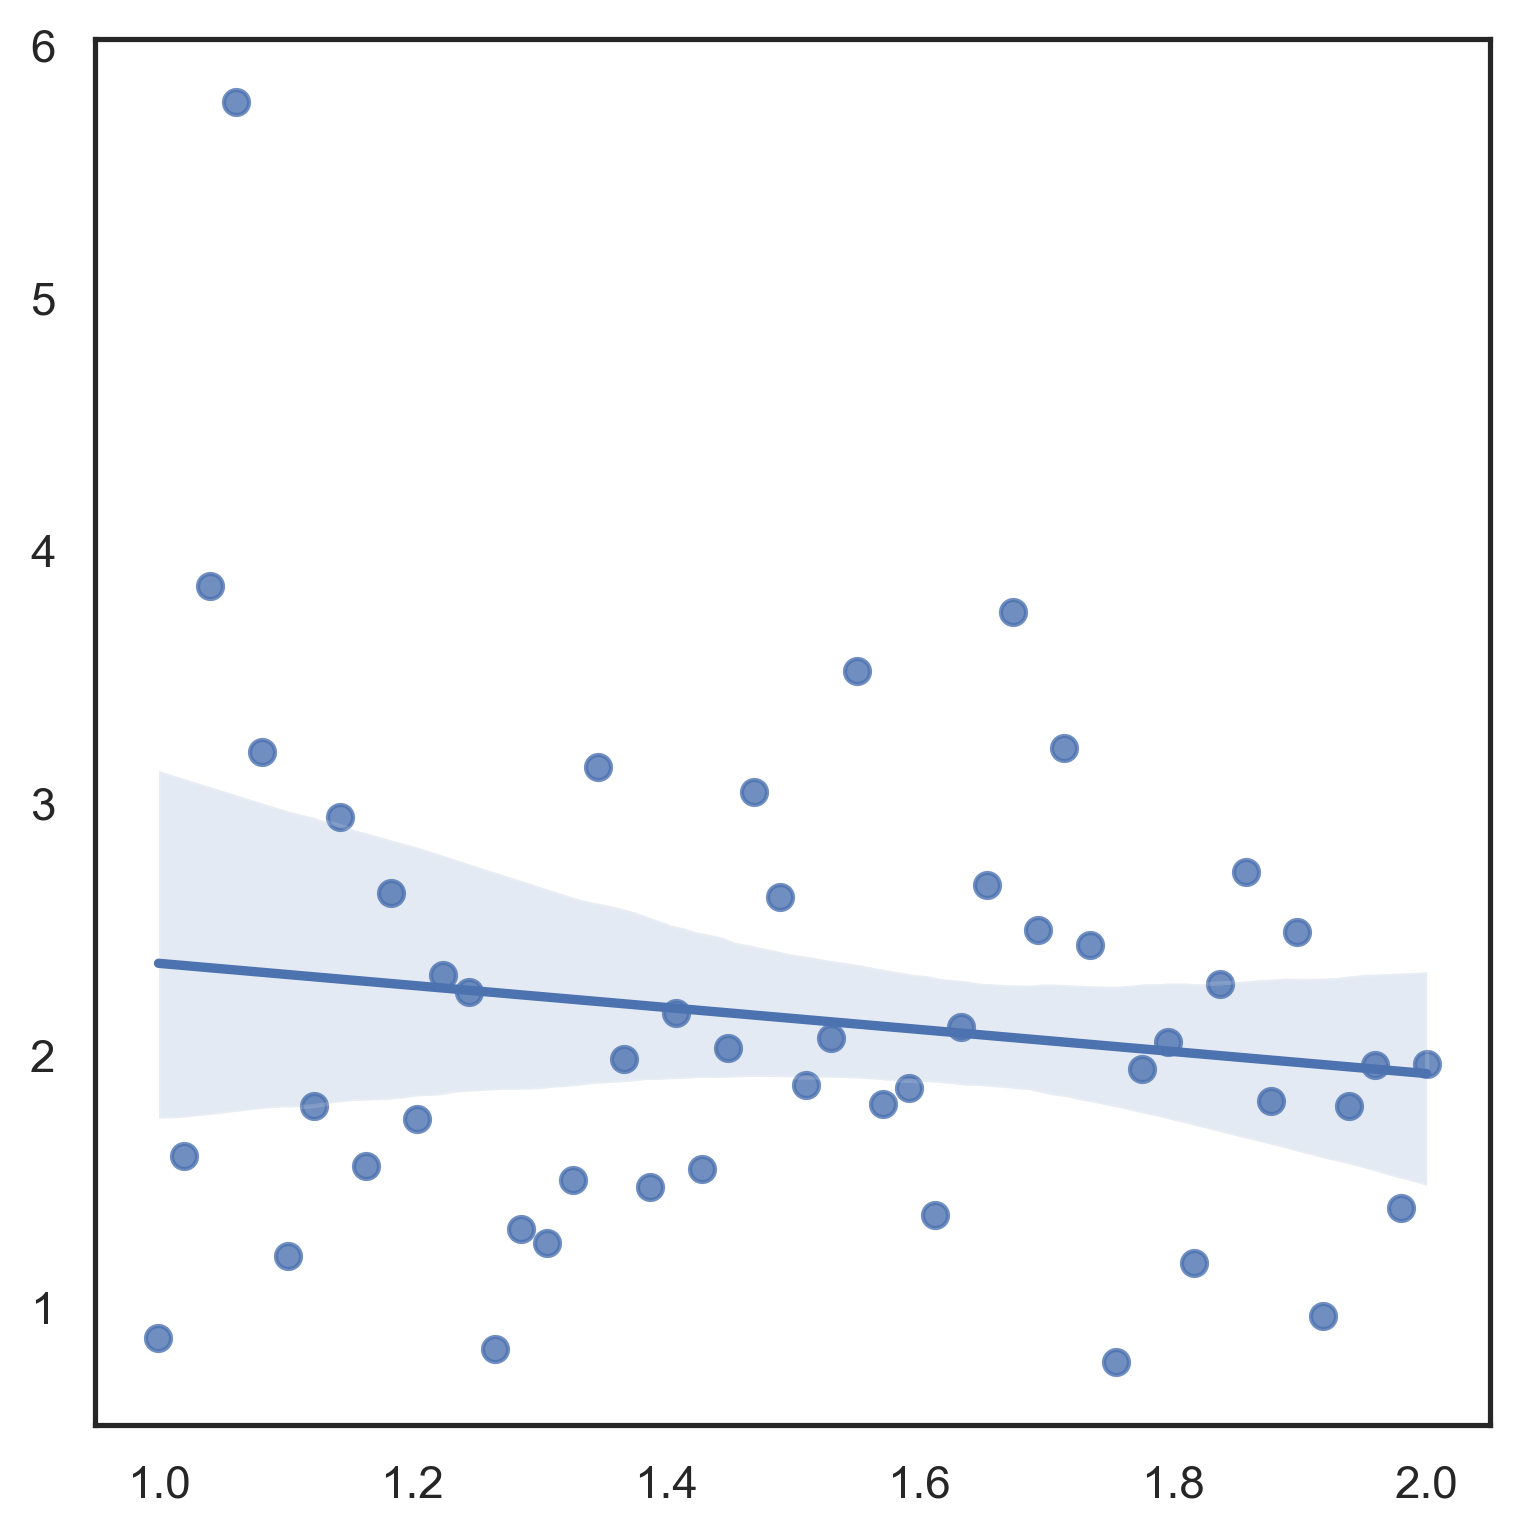

In [158]:
sns.regplot(x=warray, y=cof)

# Examples generation

In [185]:
N, M = 5, 5
example_model = Paras(N, M)
preference, _ = int_preferences(N, M, para.mu, 0)

In [186]:
preference

array([[0.33177089, 0.        , 0.        , 0.33420023, 0.33402888],
       [0.24976047, 0.24907833, 0.        , 0.25150539, 0.24965582],
       [0.33335591, 0.        , 0.33618446, 0.33045962, 0.        ],
       [0.2497331 , 0.25020061, 0.25231645, 0.24774984, 0.        ],
       [0.3340577 , 0.33373537, 0.33220693, 0.        , 0.        ]])

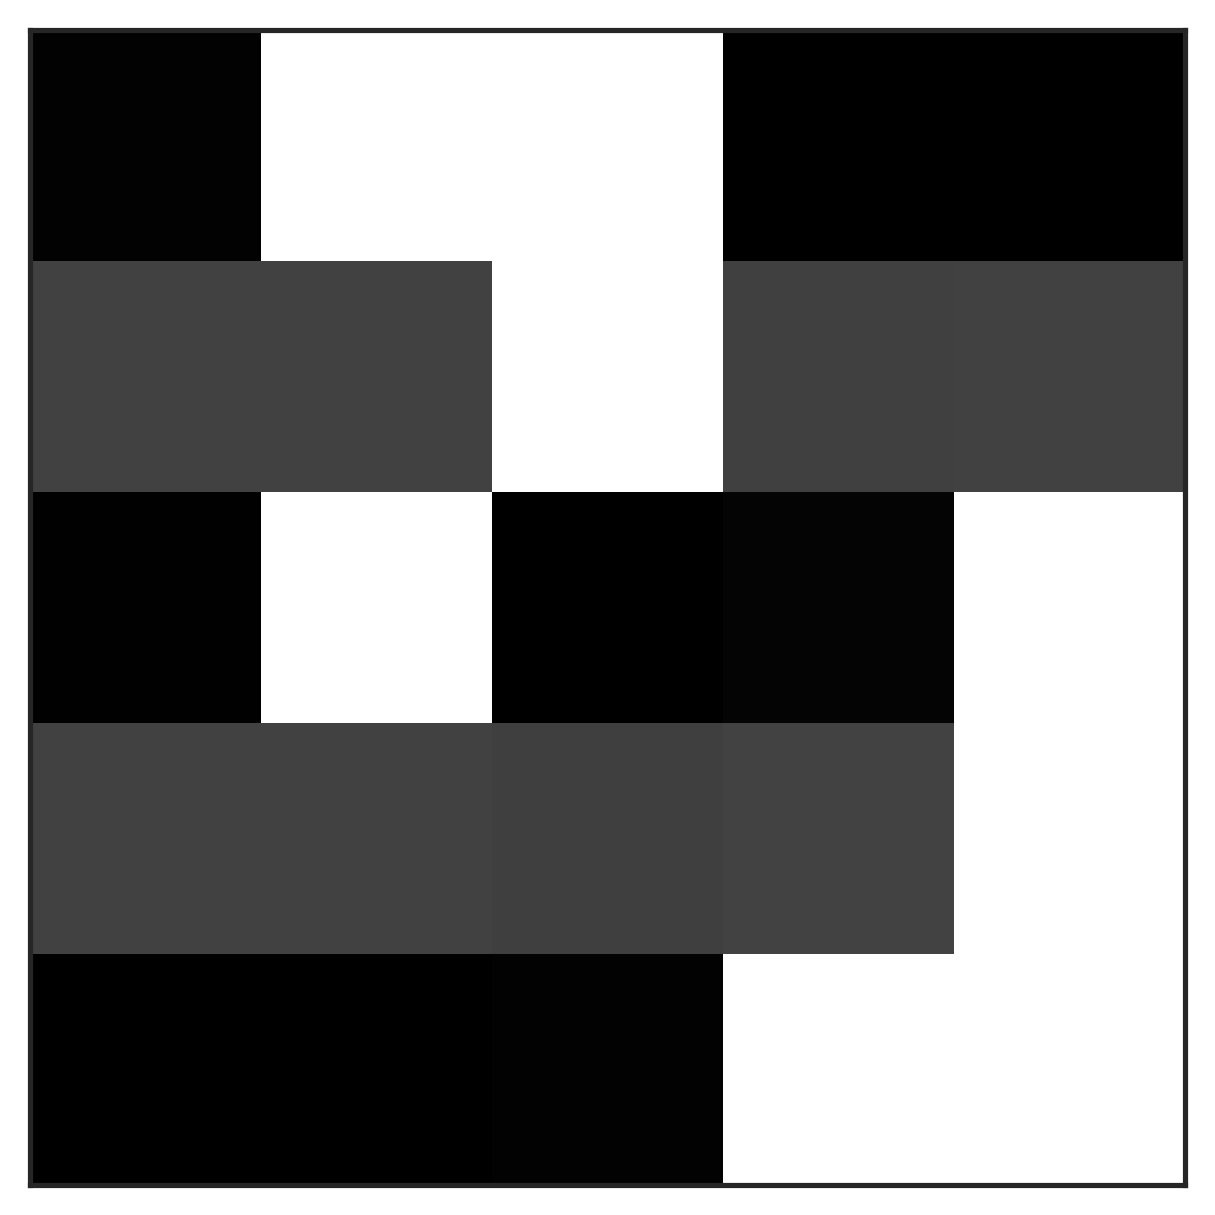

In [189]:
Xlabel = ''
Ylabel = ''
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(111)
im = plt.imshow(preference, cmap = 'binary')
ax = plt.gca()
# ax.set_xticks(np.arange(-.5,5,1), minor = True)
# ax.set_yticks(np.arange(-.5,5,1), minor = True)
plt.xticks([])
plt.yticks([])
ax.grid(which = 'minor', color = 'k', linestyle='-', linewidth=1)
plt.title( "" )
plt.show()

In [209]:
wl = [1, 1.2, 1.4, 1.6, 1.8, 2.0]
pdfl = [np.random.beta(1, val, 1000000) for val in wl]

Text(0.5, 0, '$ \\log_{10} m_i $')

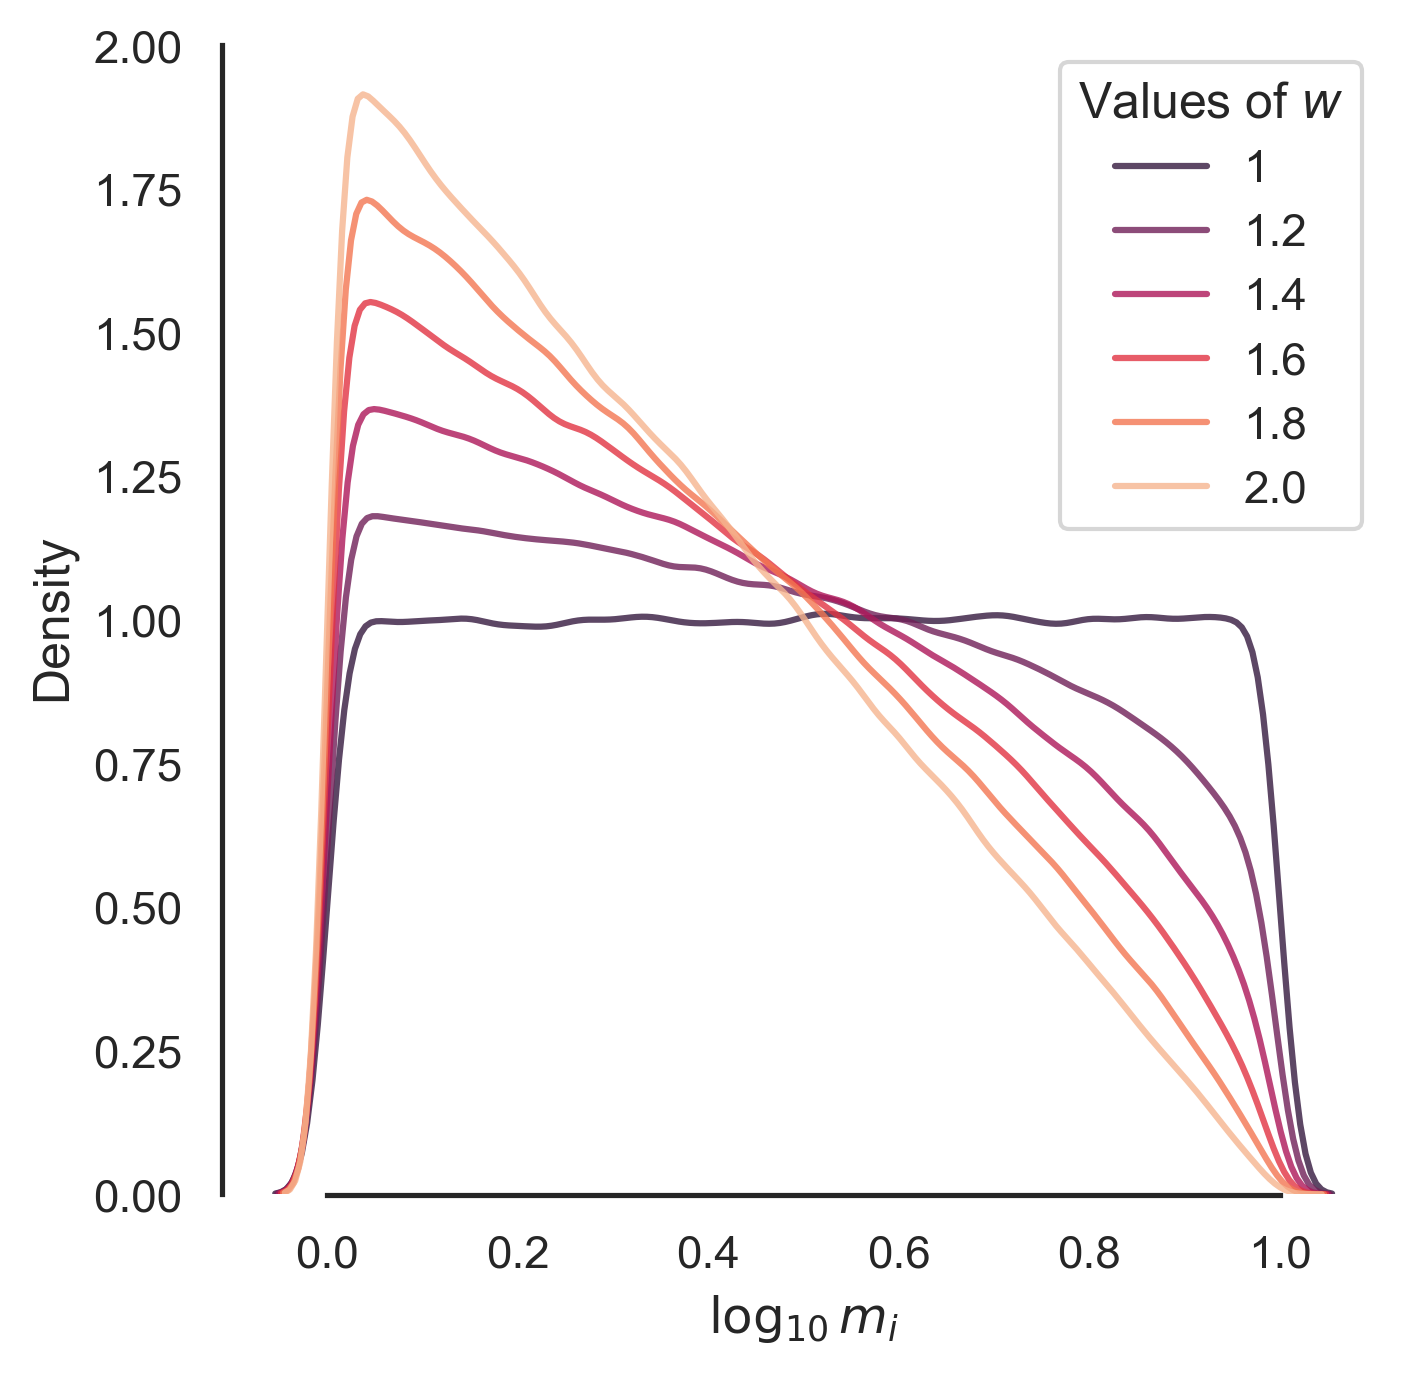

In [210]:
fig = plt.figure(figsize=(5, 5), dpi=300)
fill_color = sns.color_palette("rocket")[0:6]
for i, pdf in enumerate(pdfl):
    sns.kdeplot(pdf, label=f'{wl[i]}', color=fill_color[i], alpha=0.8)

plt.legend(title='Values of $w$')
sns.despine(offset=0.1, trim=True)
plt.xlabel('$ \log_{10} m_i $')